In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd


# read data

In [139]:
# Training data
data_train = np.load('s2_train.npy',allow_pickle=True)
data_test  = np.load('s2_test.npy' ,allow_pickle=True)


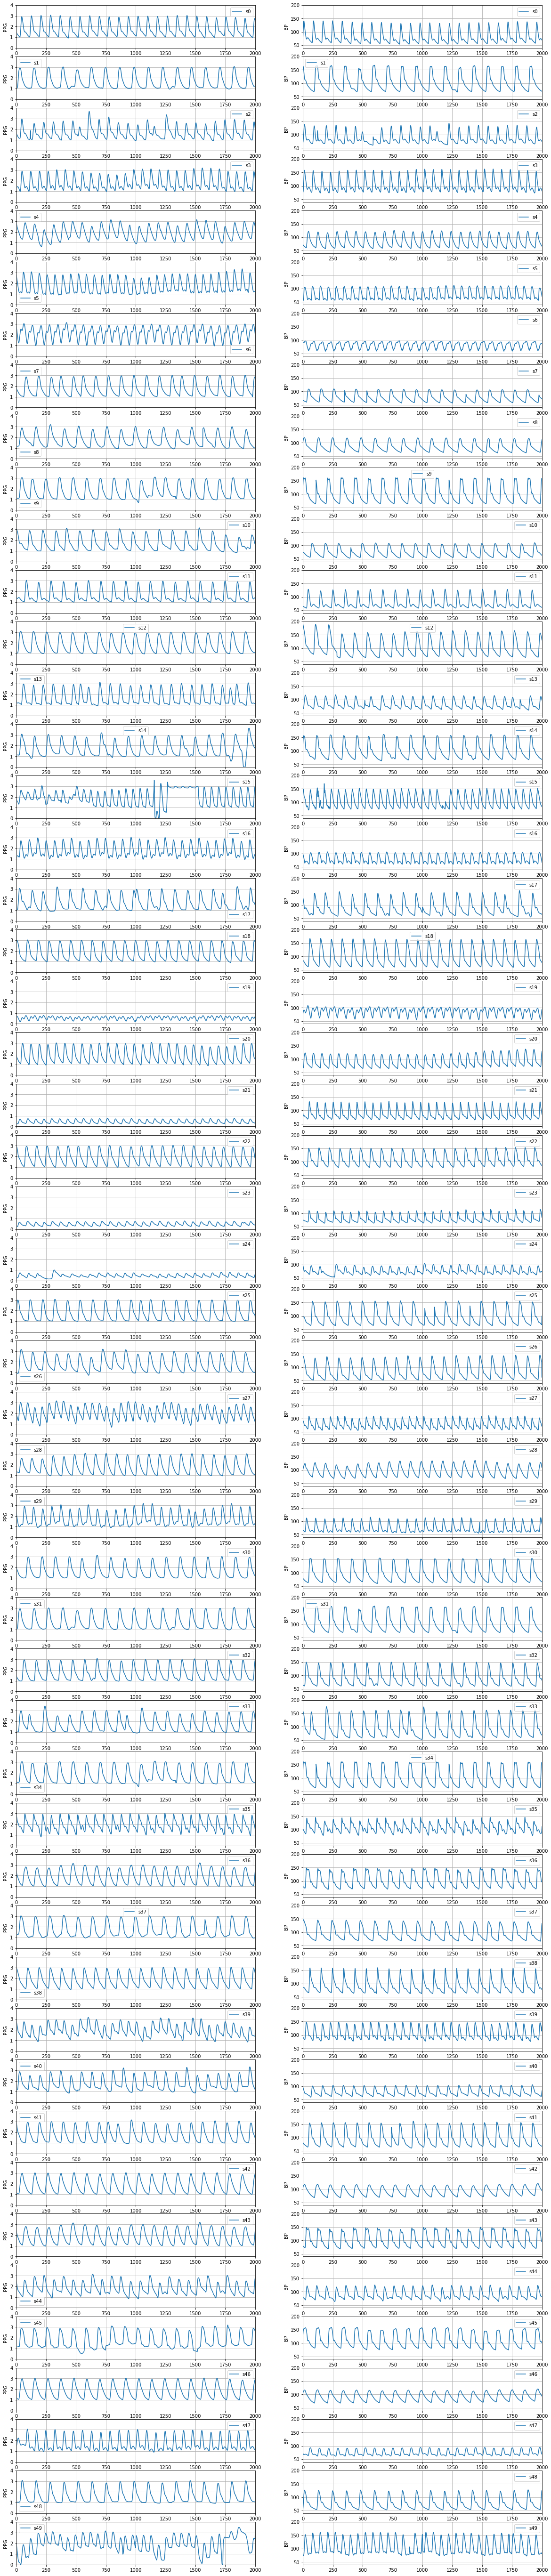

In [140]:
#Ploting data
i=0
fig,ax=plt.subplots(50,2,figsize=(20,100))
for r in range(0,len(data_train)):
    ax[r,0].plot(data_train[i][0])
    ax[r,0].grid(True)
    ax[r,0].legend(['s%d'%(i)])
    ax[r,0].set_xlim(0,2000)
    ax[r,0].set_ylim(0,4)
    ax[r,0].set_ylabel('PPG')
    ax[r,1].plot(data_train[i][1])
    ax[r,1].grid(True)
    ax[r,1].legend(['s%d'%(i)])
    ax[r,1].set_xlim(0,2000)
    ax[r,1].set_ylim(40,200)
    ax[r,1].set_ylabel('BP')
    i=i+1

# Finding Systilic and Diastolic for training data and plotting 10 pulse

In [141]:
# Python program to find N largest
# element from given list of integers
# Function returns N largest elements
def Nmaxelements(list1, N,u):
    final_list = []
    pos=[]
    m=max(list1)
    up=m-u

    for j in range(len(list1)):
        if (list1[j] >= up):
            if(j+2 < len(list1)):
                if(list1[j-1]<list1[j] and list1[j-2]<list1[j] and list1[j+1]<list1[j] and list1[j+2]<list1[j] ):
                    if(len(final_list)<N):
                        final_list.append(list1[j])
                        pos.append(j)
                        
            
    return(final_list),pos
            
    

In [142]:
# Python program to find N largest
# element from given list of integers
# Function returns N largest elements
def Nminelements(list1,N,down):
    final_list = []
    pos=[]
    m=min(list1)
    d=m+down

    for j in range(len(list1)):
        if (list1[j] <= d):
            if(j+2 < len(list1)):
                if(list1[j-1]>list1[j] and list1[j-2]>list1[j] and list1[j+1]>list1[j] and list1[j+2]>list1[j] ):
                    if(len(final_list)<N):
                        final_list.append(list1[j])
                        pos.append(j)
                        
            
    return(final_list),pos
            
    

In [143]:
sys=[0]*48
dia=[0]*48
data_PPG=[0]*48
data_BP=[0]*48
max_BP=[0]*48
xmax_BP=[0]*48
min_BP=[0]*48
xmin_BP=[0]*48
# Sample 
#S0
b=data_train[0][0]
data_PPG[0]=b[0:850]
b=data_train[0][1]
data_BP[0]=b[50:880]
#S1
b=data_train[1][0]
data_PPG[1]=b[600:1750]
b=data_train[1][1]
data_BP[1]=b[600:1850]
#S2
b=data_train[2][0]
data_PPG[2]=b[2100:2900]
b=data_train[2][1]
data_BP[2]=b[2100:2900]
#S3
b=data_train[3][0]
data_PPG[3]=b[1000:1750]
b=data_train[3][1]
data_BP[3]=b[1100:1850]
#S4
b=data_train[4][0]
data_PPG[4]=b[0:850]
b=data_train[4][1]
data_BP[4]=b[0:820]
#S5
b=data_train[5][0]
data_PPG[5]=b[0:700]
b=data_train[5][1]
data_BP[5]=b[60:700]
#S6
b=data_train[6][0]
data_PPG[6]=b[10:740]
b=data_train[6][1]
data_BP[6]=b[50:750]
#S7
b=data_train[7][0]
data_PPG[7]=b[540:1550]
b=data_train[7][1]
data_BP[7]=b[600:1700]
#S8
b=data_train[8][0]
data_PPG[8]=b[0:1200]
b=data_train[8][1]
data_BP[8]=b[100:1300]
#S9
b=data_train[9][0]
data_PPG[9]=b[0:1000]
b=data_train[9][1]
data_BP[9]=b[150:1200]
#S10
b=data_train[10][0]
data_PPG[10]=b[70:1150]
b=data_train[10][1]
data_BP[10]=b[460:1550]
    

In [144]:
#S11
b=data_train[11][0]
data_PPG[11]=b[0:1100]
b=data_train[11][1]
data_BP[11]=b[0:1000]
#S12
b=data_train[12][0]
data_PPG[12]=b[600:1650]
b=data_train[12][1]
data_BP[12]=b[500:1500]
#S13
b=data_train[13][0]
data_PPG[13]=b[800:1700]
b=data_train[13][1]
data_BP[13]=b[650:1500]
#S14
b=data_train[14][0]
data_PPG[14]=b[3000:4150]
b=data_train[14][1]
data_BP[14]=b[3000:4100]
#S15
b=data_train[15][0]
data_PPG[15]=b[2100:2700]
b=data_train[15][1]
data_BP[15]=b[2120:2750]
#S16
b=data_train[16][0]
data_PPG[16]=b[0:700]
b=data_train[16][1]
data_BP[16]=b[50:750]
#S17
b=data_train[17][0]
data_PPG[17]=b[3050:4100]
b=data_train[17][1]
data_BP[17]=b[3100:4300]
#S18
b=data_train[18][0]
data_PPG[18]=b[50:950]
b=data_train[18][1]
data_BP[18]=b[0:900]
#S19
#
#S20->19
b=data_train[20][0]
data_PPG[19]=b[0:750]
b=data_train[20][1]
data_BP[19]=b[50:750]


In [145]:
#S21->20
b=data_train[21][0]
data_PPG[20]=b[0:650]
b=data_train[21][1]
data_BP[20]=b[30:700]
#S22->21
b=data_train[22][0]
data_PPG[21]=b[50:930]
b=data_train[22][1]
data_BP[21]=b[100:950]
#S23->22
b=data_train[23][0]
data_PPG[22]=b[700:1400]
b=data_train[23][1]
data_BP[22]=b[700:1400]
#S24->23
b=data_train[24][0]
data_PPG[23]=b[1600:2350]
b=data_train[24][1]
data_BP[23]=b[1600:2300]
#S25->24
b=data_train[25][0]
data_PPG[24]=b[100:900]
b=data_train[25][1]
data_BP[24]=b[50:950]
#S26->25
b=data_train[26][0]
data_PPG[25]=b[1000:2000]
b=data_train[26][1]
data_BP[25]=b[1000:2000]
#S27->26
b=data_train[27][0]
data_PPG[26]=b[0:600]
b=data_train[27][1]
data_BP[26]=b[10:600]
#S28->27
b=data_train[28][0]
data_PPG[27]=b[600:1500]
b=data_train[28][1]
data_BP[27]=b[600:1500]
#S29->28
b=data_train[29][0]
data_PPG[28]=b[0:800]
b=data_train[29][1]
data_BP[28]=b[0:750]
#S30->29
b=data_train[30][0]
data_PPG[29]=b[0:1000]
b=data_train[30][1]
data_BP[29]=b[0:1200]

In [146]:
#S31->30
b=data_train[31][0]
data_PPG[30]=b[600:1800]
b=data_train[31][1]
data_BP[30]=b[500:1750]
#S32->31
b=data_train[32][0]
data_PPG[31]=b[0:1000]
b=data_train[32][1]
data_BP[31]=b[0:1000]
#S33->32
b=data_train[33][0]
data_PPG[32]=b[1600:2700]
b=data_train[33][1]
data_BP[32]=b[1500:2500]
#S34->33
b=data_train[34][0]
data_PPG[33]=b[1600:2700]
b=data_train[34][1]
data_BP[33]=b[1500:2600]
#S35->34
b=data_train[35][0]
data_PPG[34]=b[1500:2700]
b=data_train[35][1]
data_BP[34]=b[1400:2100]
#S36->35
b=data_train[36][0]
data_PPG[35]=b[900:1900]
b=data_train[36][1]
data_BP[35]=b[1000:1900]
#S37->36
b=data_train[37][0]
data_PPG[36]=b[0:1200]
b=data_train[37][1]
data_BP[36]=b[100:1250]
#S38->37
b=data_train[38][0]
data_PPG[37]=b[0:1000]
b=data_train[38][1]
data_BP[37]=b[0:1000]
#S39->38
b=data_train[39][0]
data_PPG[38]=b[200:900]
b=data_train[39][1]
data_BP[38]=b[50:750]
#S40->39
b=data_train[40][0]
data_PPG[39]=b[0:900]
b=data_train[40][1]
data_BP[39]=b[0:900]


In [147]:
#S41->40
b=data_train[41][0]
data_PPG[40]=b[1000:2000]
b=data_train[41][1]
data_BP[40]=b[1000:2000]
#S42->41
b=data_train[42][0]
data_PPG[41]=b[0:1100]
b=data_train[42][1]
data_BP[41]=b[50:1200]
#S43->42
b=data_train[43][0]
data_PPG[42]=b[1000:2000]
b=data_train[43][1]
data_BP[42]=b[1000:2000]
#S44->43
b=data_train[44][0]
data_PPG[43]=b[0:900]
b=data_train[44][1]
data_BP[43]=b[0:800]
#S45->44
b=data_train[45][0]
data_PPG[44]=b[0:1100]
b=data_train[45][1]
data_BP[44]=b[0:1000]
#S46->45
b=data_train[46][0]
data_PPG[45]=b[0:1100]
b=data_train[46][1]
data_BP[45]=b[0:1100]
#S47->46
b=data_train[47][0]
data_PPG[46]=b[200:1000]
b=data_train[47][1]
data_BP[46]=b[200:1000]
#S48->47
b=data_train[48][0]
data_PPG[47]=b[0:1250]
b=data_train[48][1]
data_BP[47]=b[0:1250]

In [148]:
# calulation of systolic
for i in range(0,48):
    u=20
    if i==0: N=10
    if i==1: N=20
    if (i==6 ): u=5
    if (i==7 ): u=10
    if  i==42 : u=7
    max_BP[i],xmax_BP[i]=Nmaxelements(data_BP[i].tolist(), N=N,u=u)
    sys[i]=sum(max_BP[i])/len(max_BP[i])

#calculation of diastolic
for i in range(0,48):
    d=10
    if(i==3 or i==1 or i==6 or i==11 or i==20 or i==22 or i==23 or i==30 or i==46  ):d=5
    if (i==5 or i==9 or i==16 or i==33):d=3
    
    min_BP[i],xmin_BP[i]=Nminelements(data_BP[i].tolist(), N=10,down=d)
    if(len(min_BP[i])!=10):
        l=len(min_BP[i])
        num=10-l
        dis=xmin_BP[i][l-1]-xmin_BP[i][l-2]
        for j in range(1,num+1):
            min_BP[i].append(min_BP[i][l-1])
            xmin_BP[i].append(xmin_BP[i][l-1]+j*dis)
    dia[i]=sum(min_BP[i])/len(min_BP[i])

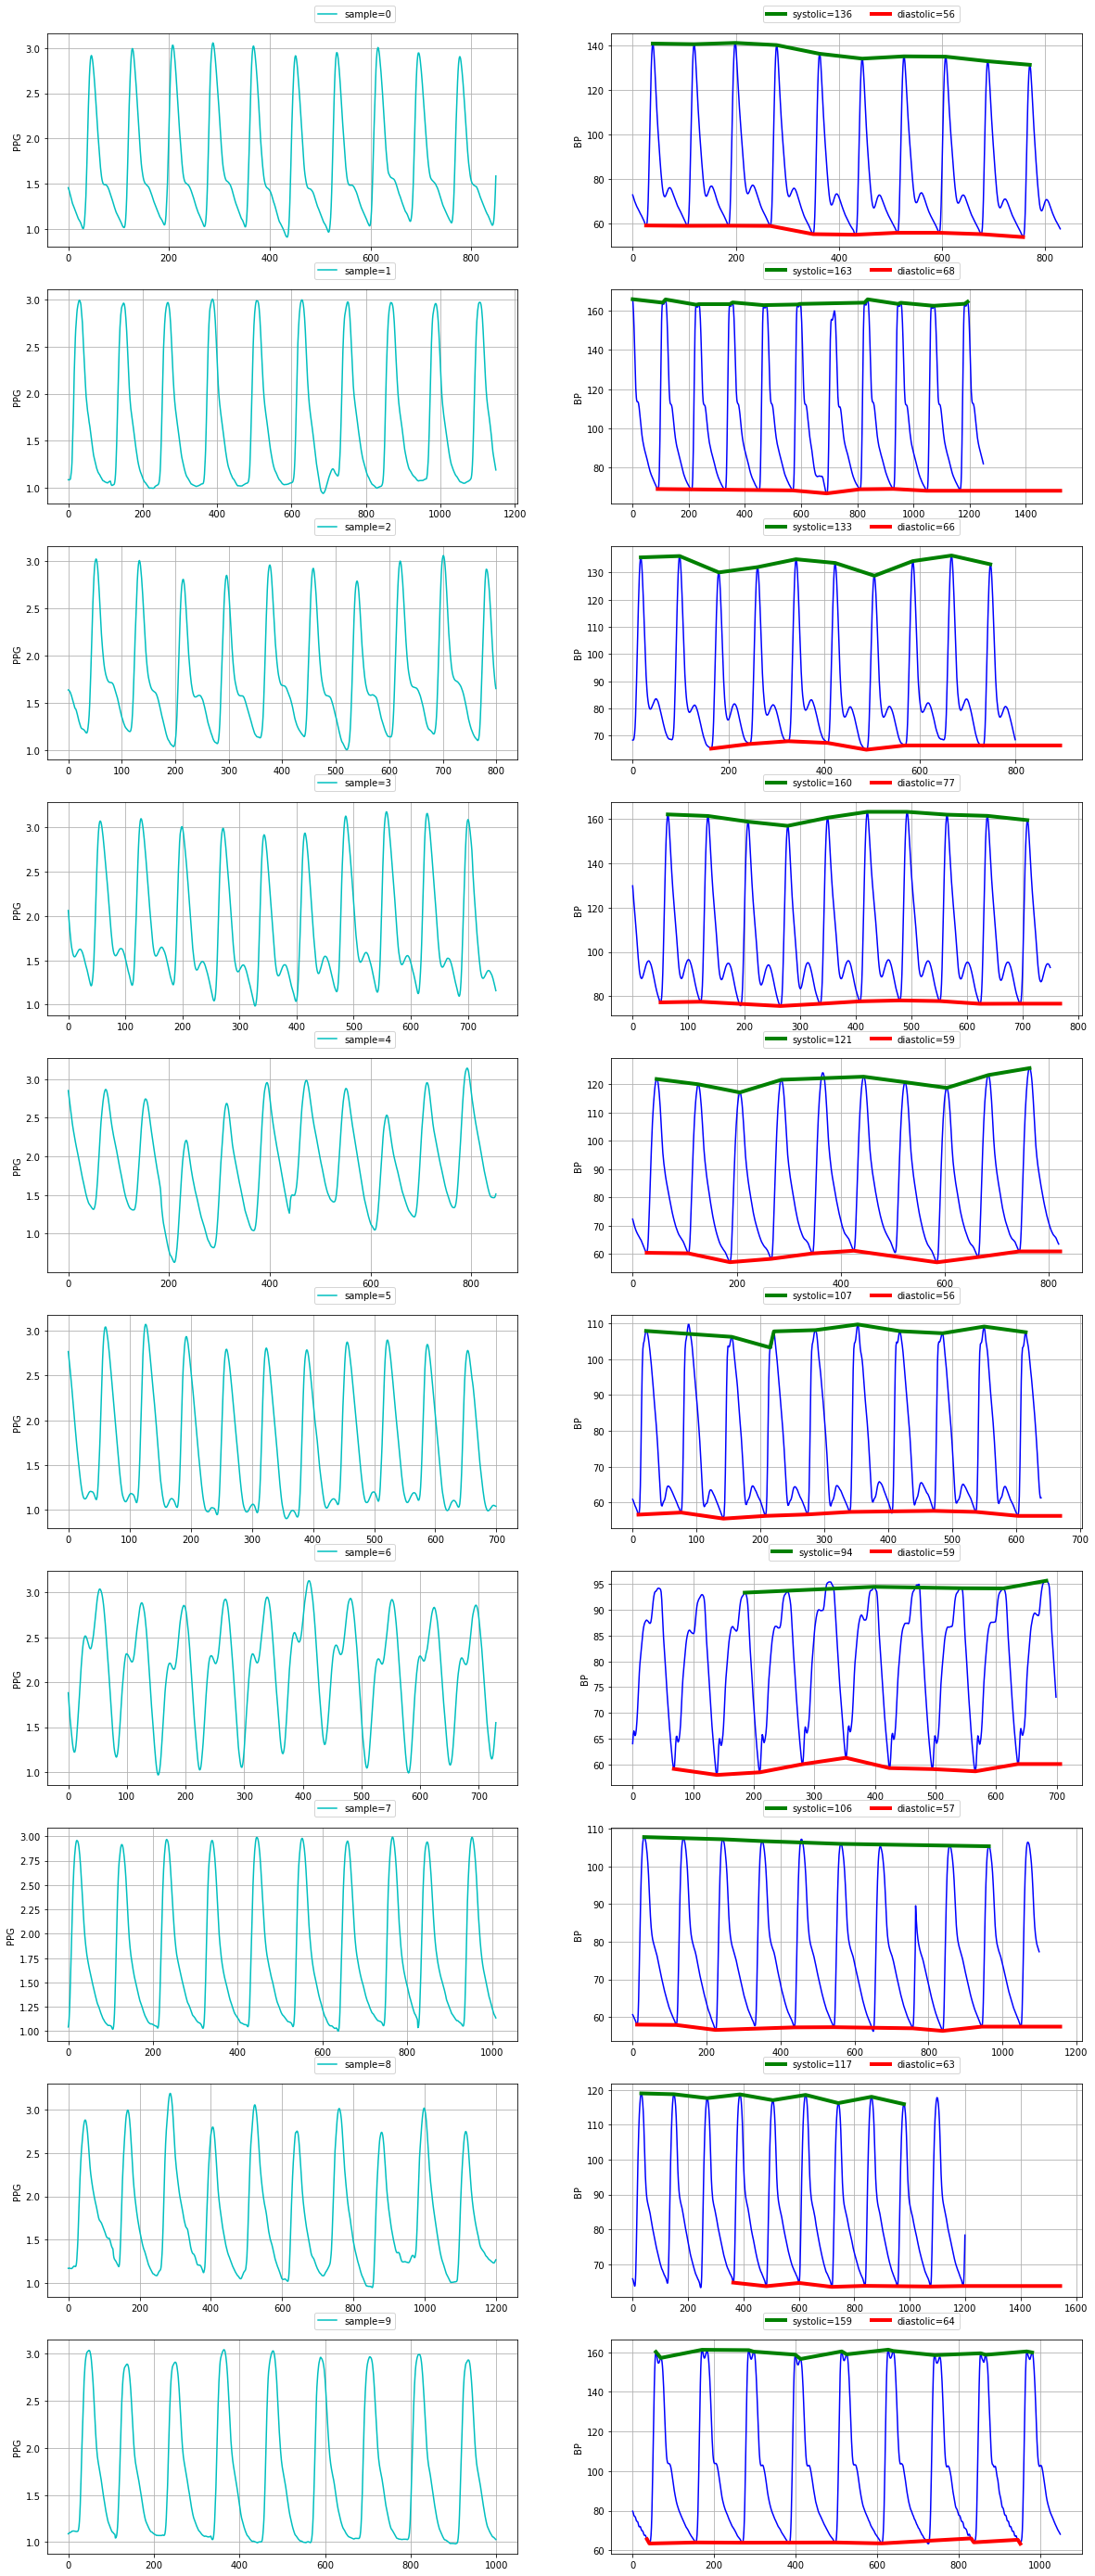

In [12]:
#plotting
fig,ax=plt.subplots(10,2,figsize=(20,50))

for r in range(0,10):
    ax[r,0].plot(data_PPG[r],color='c',label='sample=%d'%(r))
    ax[r,0].grid(True)
    ax[r,0].legend(bbox_to_anchor =(0.75, 1.15), ncol = 1)
    ax[r,0].set_ylabel('PPG')
    
    ax[r,1].plot(data_BP[r],color='b')
    ax[r,1].plot(xmax_BP[r],max_BP[r],color='g',lw=4 , label='systolic=%d'%(sys[r]))
    ax[r,1].plot(xmin_BP[r],min_BP[r],color='r',lw=4 , label='diastolic=%d'%(dia[r]))
    ax[r,1].grid(True)
    ax[r,1].legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    ax[r,1].set_ylabel('BP')

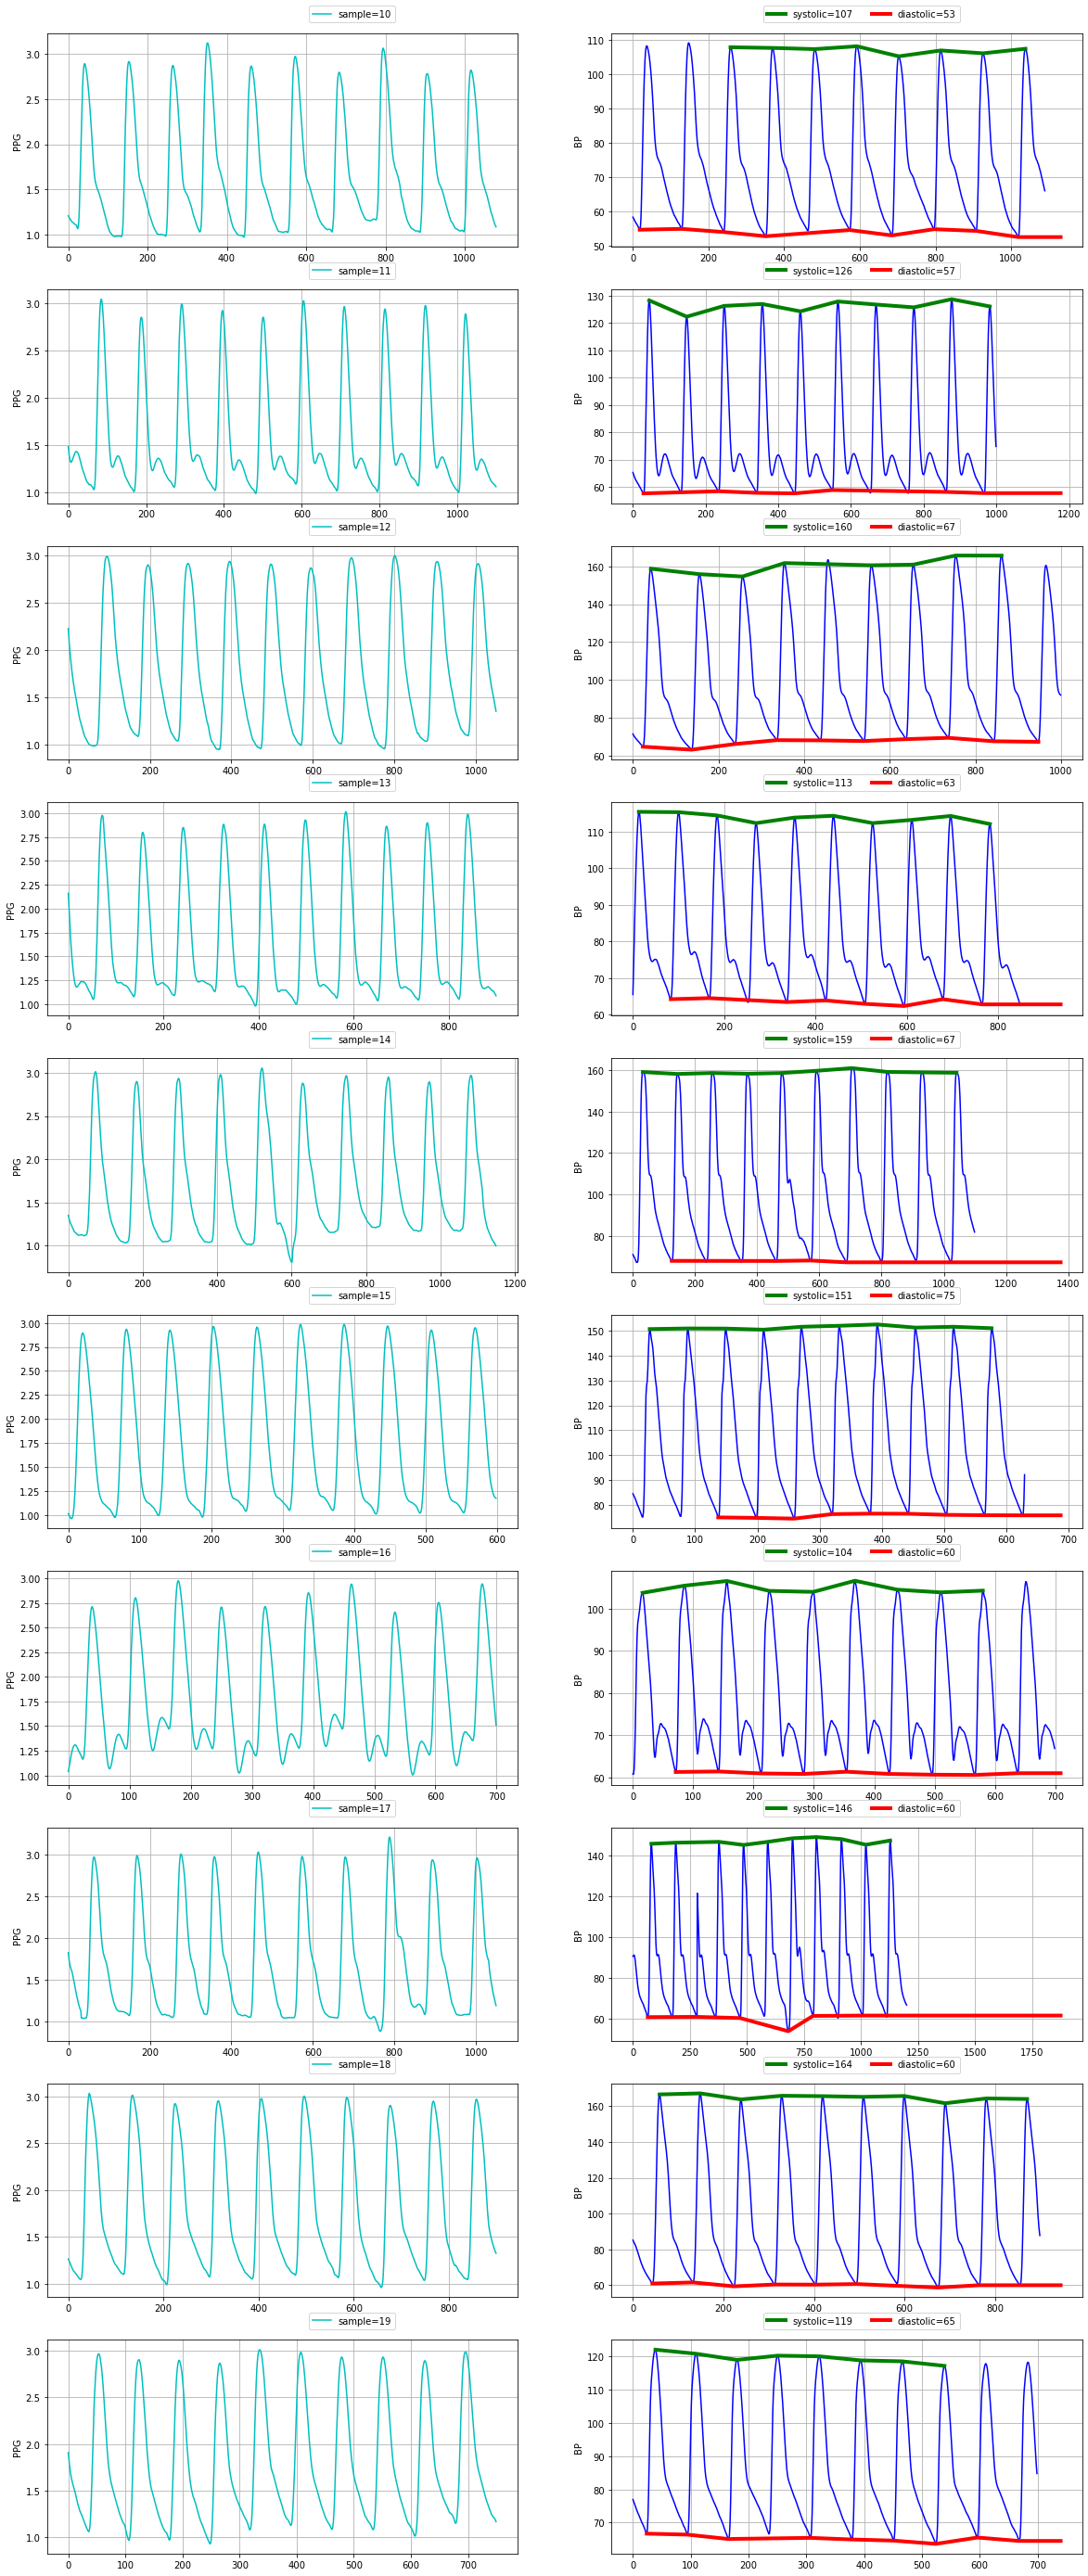

In [14]:
#plotting
fig,ax=plt.subplots(10,2,figsize=(20,50))

for i,r in zip(range(0,10),range(10,20)):
    ax[i,0].plot(data_PPG[r],color='c',label='sample=%d'%(r))
    ax[i,0].grid(True)
    ax[i,0].legend(bbox_to_anchor =(0.75, 1.15), ncol = 1)
    ax[i,0].set_ylabel('PPG')
    
    ax[i,1].plot(data_BP[r],color='b')
    ax[i,1].plot(xmax_BP[r],max_BP[r],color='g',lw=4 , label='systolic=%d'%(sys[r]))
    ax[i,1].plot(xmin_BP[r],min_BP[r],color='r',lw=4 , label='diastolic=%d'%(dia[r]))
    ax[i,1].grid(True)
    ax[i,1].legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    ax[i,1].set_ylabel('BP')

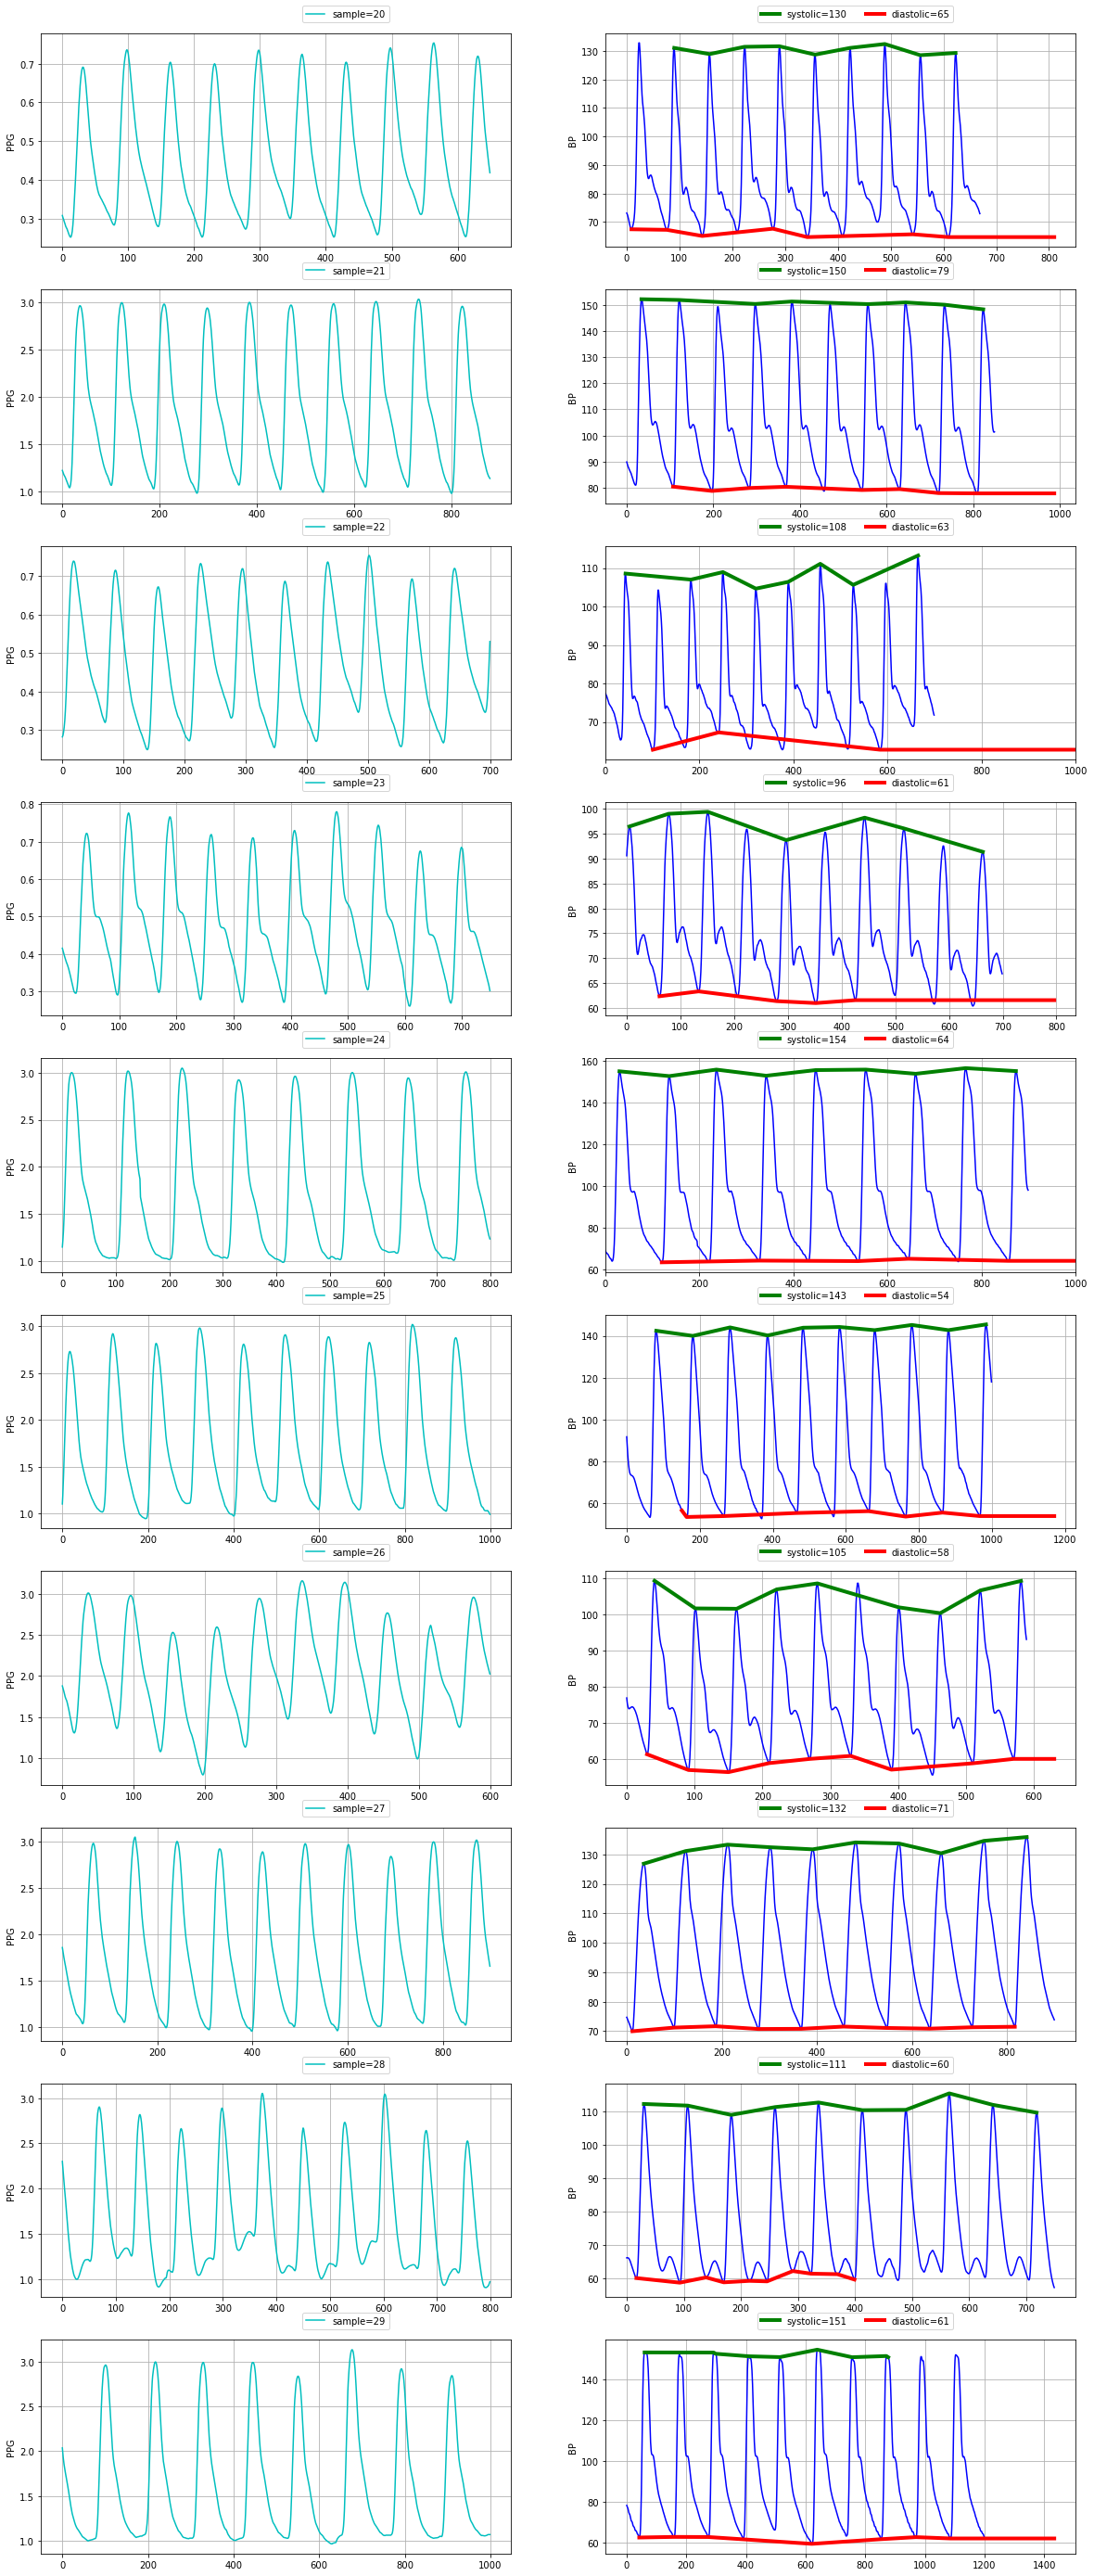

In [265]:
#plotting
fig,ax=plt.subplots(10,2,figsize=(20,50))

for i,r in zip(range(0,10),range(20,30)):
    ax[i,0].plot(data_PPG[r],color='c',label='sample=%d'%(r))
    ax[i,0].grid(True)
    ax[i,0].legend(bbox_to_anchor =(0.75, 1.15), ncol = 1)
    ax[i,0].set_ylabel('PPG')
    
    ax[i,1].plot(data_BP[r],color='b')
    ax[i,1].plot(xmax_BP[r],max_BP[r],color='g',lw=4 , label='systolic=%d'%(sys[r]))
    ax[i,1].plot(xmin_BP[r],min_BP[r],color='r',lw=4 , label='diastolic=%d'%(dia[r]))
    ax[i,1].grid(True)
    ax[i,1].legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    ax[i,1].set_ylabel('BP')
    if(r==22 or  r==24):ax[i,1].set_xlim(0,1000)

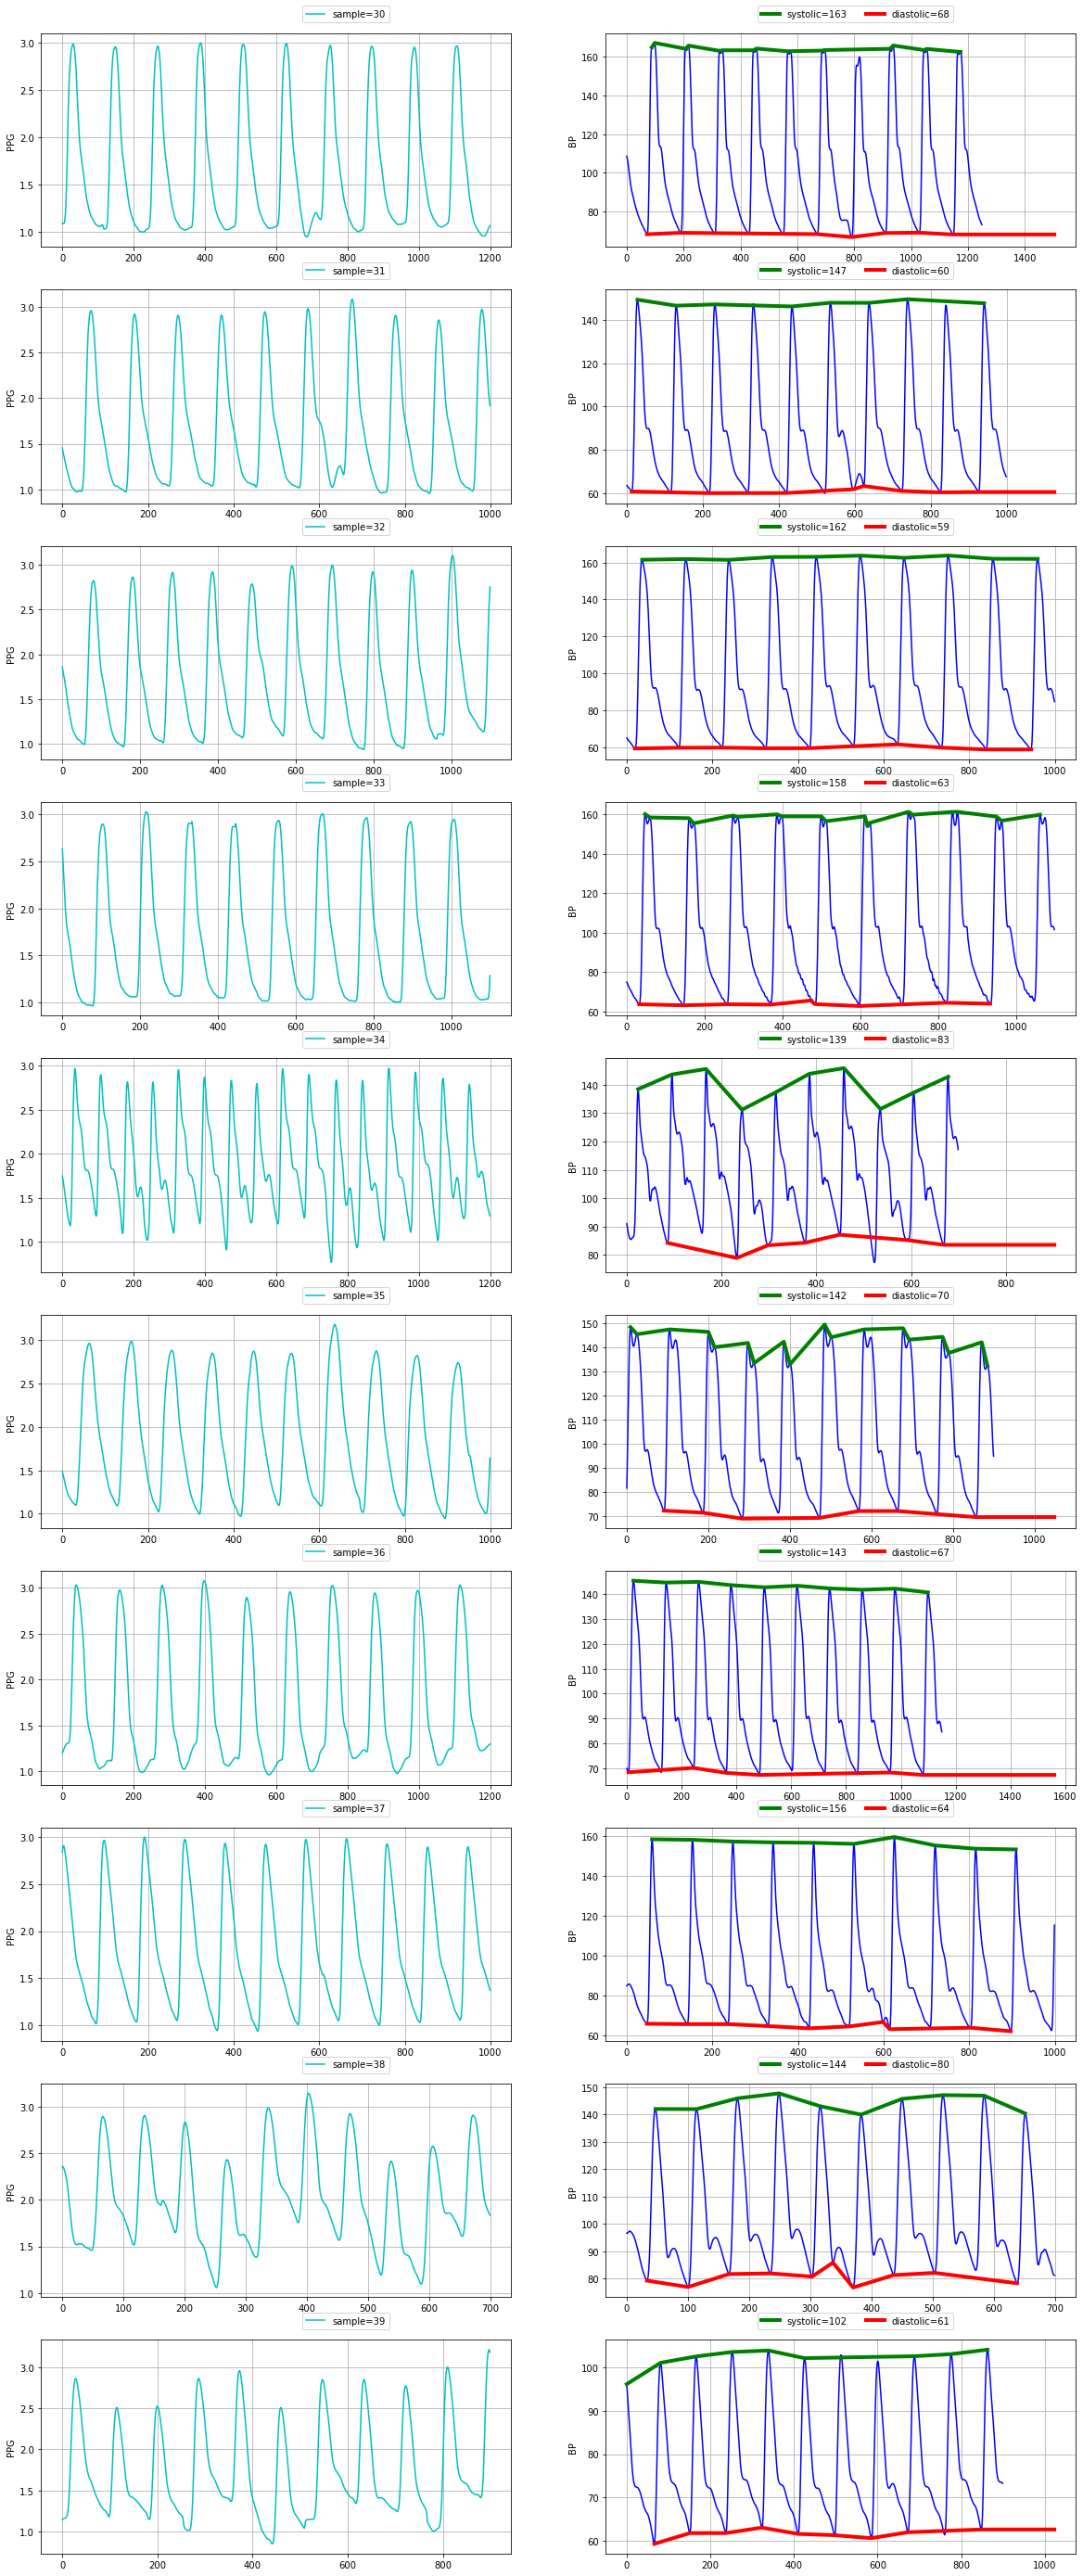

In [15]:
#plotting
fig,ax=plt.subplots(10,2,figsize=(20,50))

for i,r in zip(range(0,10),range(30,40)):
    ax[i,0].plot(data_PPG[r],color='c',label='sample=%d'%(r))
    ax[i,0].grid(True)
    ax[i,0].legend(bbox_to_anchor =(0.75, 1.15), ncol = 1)
    ax[i,0].set_ylabel('PPG')
    
    ax[i,1].plot(data_BP[r],color='b')
    ax[i,1].plot(xmax_BP[r],max_BP[r],color='g',lw=4 , label='systolic=%d'%(sys[r]))
    ax[i,1].plot(xmin_BP[r],min_BP[r],color='r',lw=4 , label='diastolic=%d'%(dia[r]))
    ax[i,1].grid(True)
    ax[i,1].legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    ax[i,1].set_ylabel('BP')
    #if(r==22 or  r==24):ax[i,1].set_xlim(0,1000)

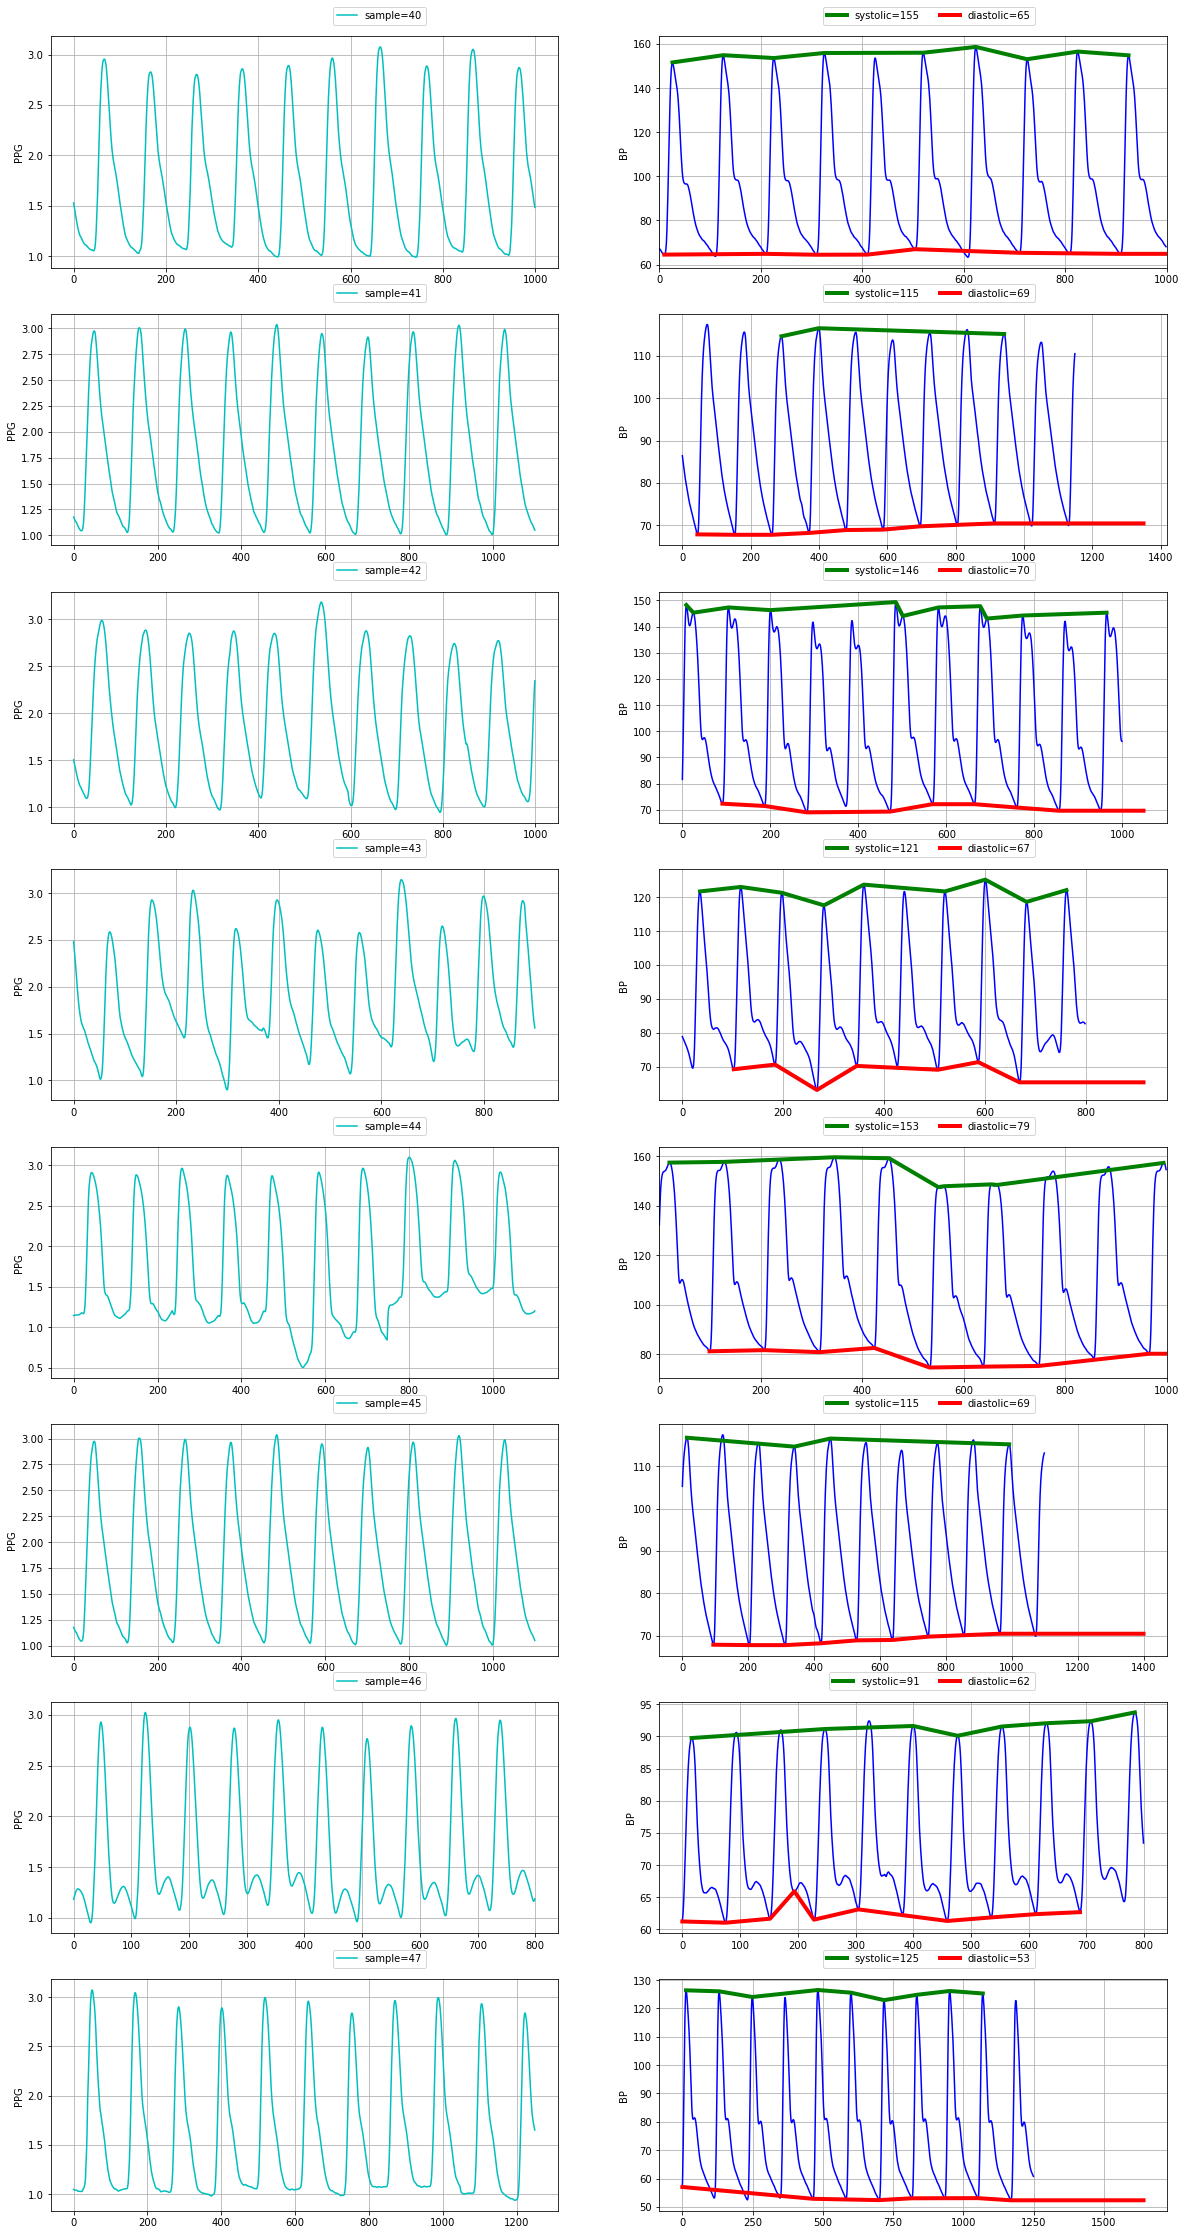

In [16]:
#plotting
fig,ax=plt.subplots(8,2,figsize=(20,40))

for i,r in zip(range(0,8),range(40,48)):
    ax[i,0].plot(data_PPG[r],color='c',label='sample=%d'%(r))
    ax[i,0].grid(True)
    ax[i,0].legend(bbox_to_anchor =(0.75, 1.15), ncol = 1)
    ax[i,0].set_ylabel('PPG')
    
    ax[i,1].plot(data_BP[r],color='b')
    ax[i,1].plot(xmax_BP[r],max_BP[r],color='g',lw=4 , label='systolic=%d'%(sys[r]))
    ax[i,1].plot(xmin_BP[r],min_BP[r],color='r',lw=4 , label='diastolic=%d'%(dia[r]))
    ax[i,1].grid(True)
    ax[i,1].legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    ax[i,1].set_ylabel('BP')
    if(r==40 or r==44):ax[i,1].set_xlim(0,1000)

In [149]:
# Avarage
s=0
for i in range(0,len(data_PPG)):
    s=s+sys[i]
mean_value=s/len(sys)
print('Average of Labels of training data(systolic) = %f'%(mean_value))  
SST_sys=0
for data in range(0,len(data_PPG)):
    SST_sys=(sys[data]-mean_value)**2+SST_sys
T_SST_sys=SST_sys
print("Total sum of squer for data_test(SST)__systolic=%f"%(SST_sys))
print('SSE/n=%f'%(SST_sys/len(sys)))

print('\n')
print('-----------------------------------------------------------------')
s=0
for i in range(0,len(data_PPG)):
    s=s+dia[i]
mean_value=s/len(dia)
print('Average of Labels of training data(systolic) = %f'%(mean_value))  
SST_dia=0
for data in range(0,len(data_PPG)):
    SST_dia=(dia[data]-mean_value)**2+SST_dia
T_SST_dia=SST_dia
print("Total sum of squer for data_test(SST)__diastolic=%f"%(SST_dia))
print('SSE/n=%f'%(SST_dia/len(dia)))
        
        

Average of Labels of training data(systolic) = 133.868703
Total sum of squer for data_test(SST)__systolic=23291.075353
SSE/n=485.230737


-----------------------------------------------------------------
Average of Labels of training data(systolic) = 64.988423
Total sum of squer for data_test(SST)__diastolic=2331.861468
SSE/n=48.580447


In [150]:
#Creating Dataset with same length
length=[]
for i in range(0,len(data_PPG )):
    length.append(len(data_PPG [i]))
print('Max length=',max(length)) 

arr=[0]*len(data_PPG)
for data in range(0,len(data_PPG)):
    x=np.linspace(0,len(data_PPG[data])-1,len(data_PPG[data]))
    y=data_PPG[data]
    add=max(length)-len(data_PPG[data])
    mymodel = np.poly1d(np.polyfit(x, y,2))
    #myline = np.linspace(0,158,159)
    #plt.scatter(x, y)
    #plt.plot(myline, mymodel(myline))
    #plt.show()
    l=[]
    for i in range(len(data_PPG[data]),max(length)):
        l.append(mymodel(i))
    arr[data] = np.concatenate((data_PPG[data].tolist(), l))

Max length= 1250


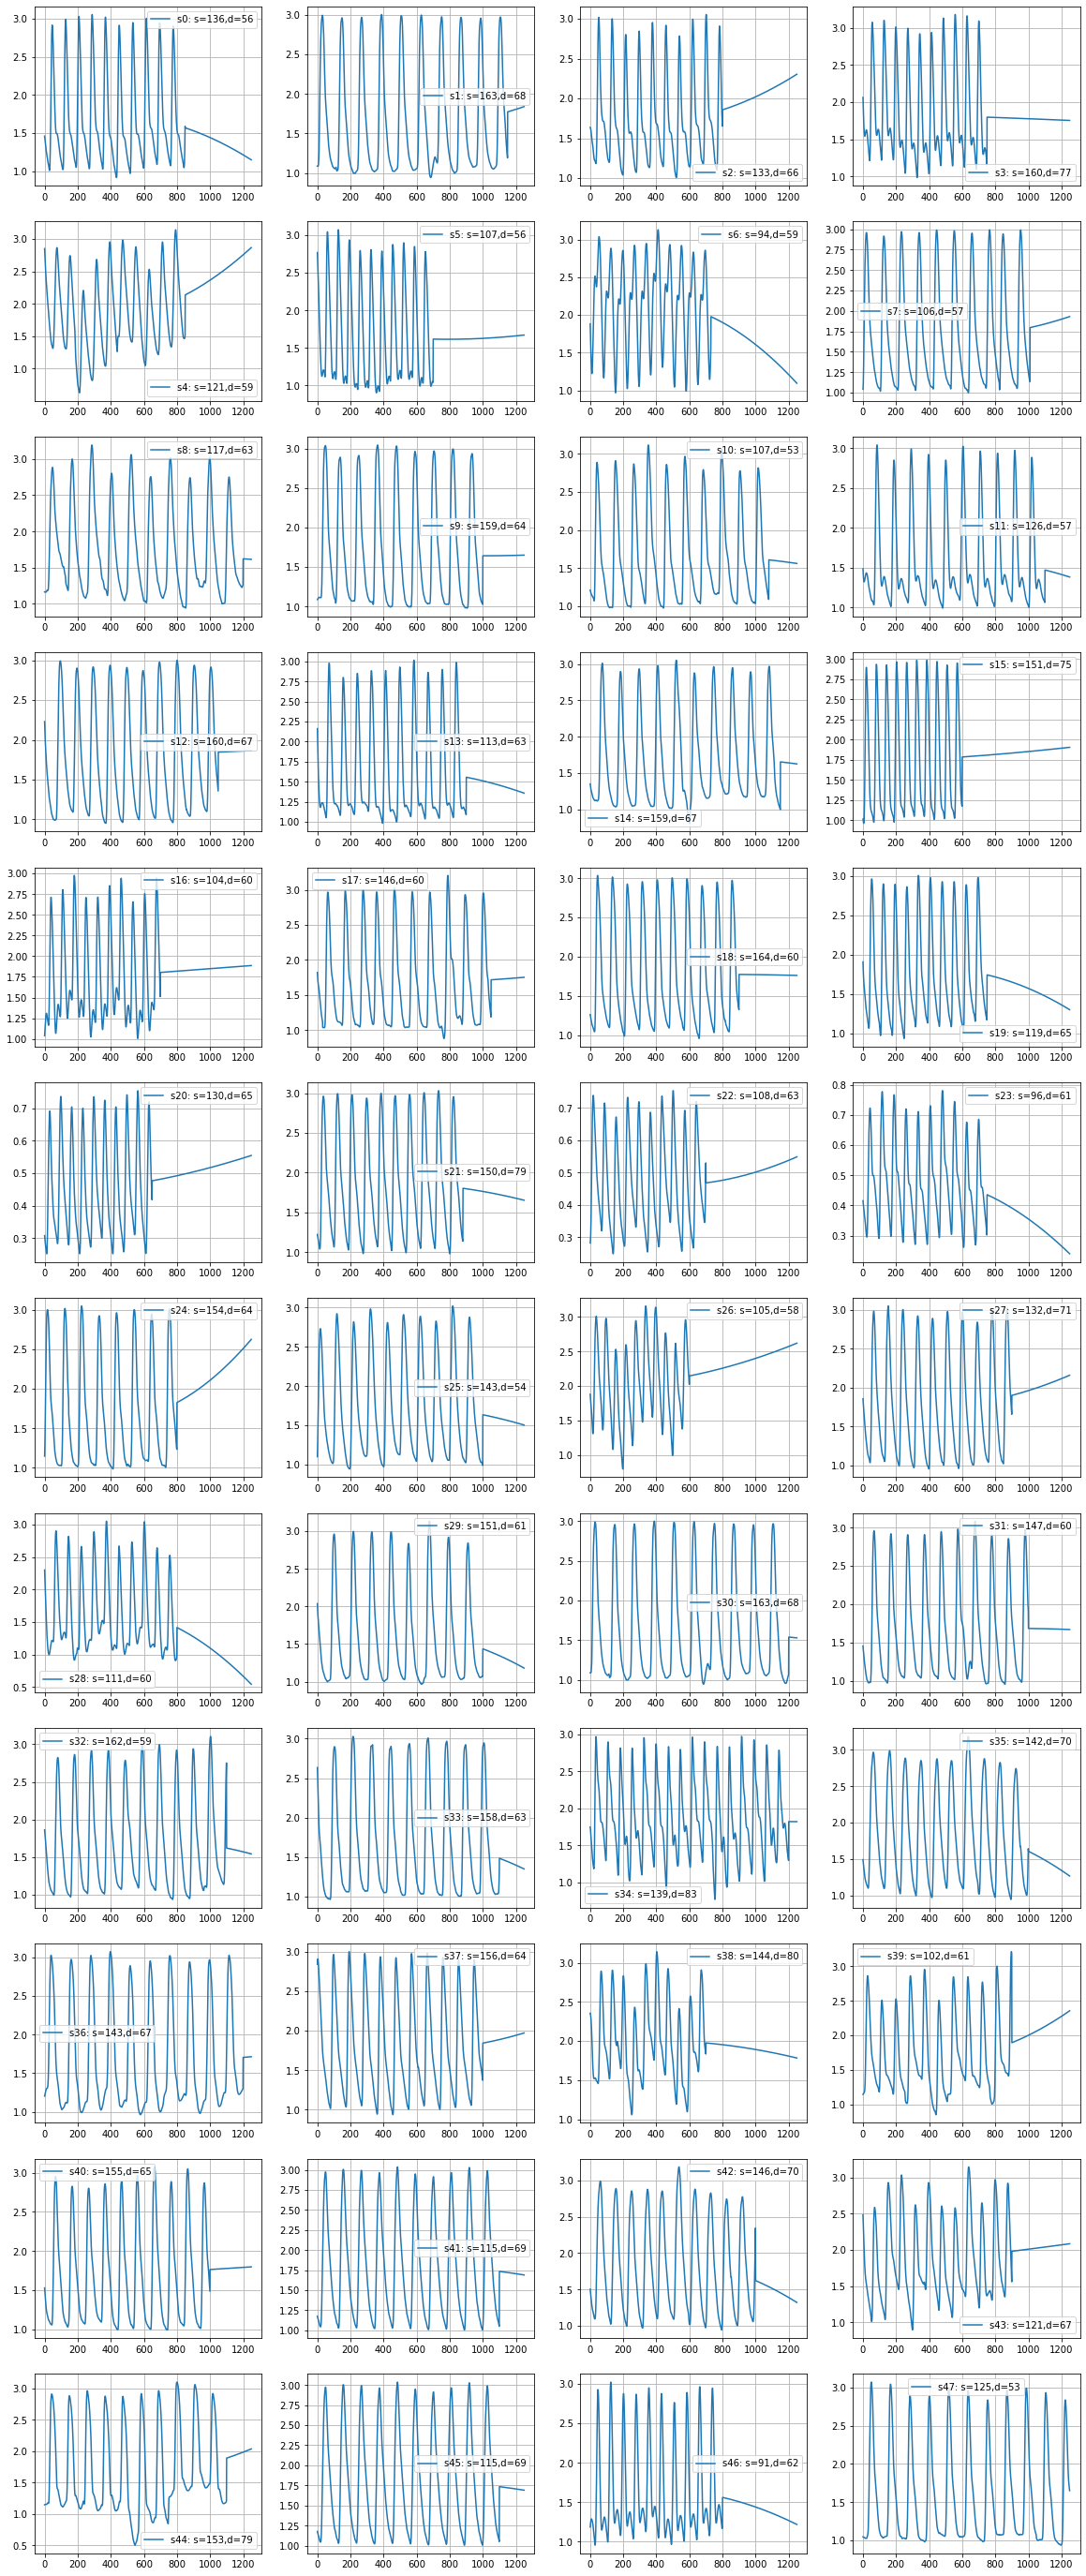

In [111]:
#ploting dataset (they have same length)
i=0
fig,ax=plt.subplots(12,4,figsize=(20,50))
for r in range(0,12):
    for c in range(0,4):
        if i<len(arr):
            ax[r,c].plot(arr[i])
            ax[r,c].grid(True)
            ax[r,c].legend(['s%d: s=%d,d=%d'%(i,sys[i],dia[i])])
            #ax[r,c].set_xlim(0,200)
            #ax[r,c].set_ylim(1,3)
        i=i+1
    if c==3:
        c=0

In [151]:
# All Data that we can use
sample=['sample'+str(i) for i in range(0,len(data_PPG))]
f=['f'+str(i) for i in range(0,max(length))]
systolic =['systolic']
diastolic=['diastolic']
data=pd.DataFrame(columns=[*f,*systolic,*diastolic])
for i in range(0,len(data_PPG)):
    for j in range(0,len(arr[i])):
        data.loc[i,'f'+str(j)]=arr[i][j]
    data.loc[i,'systolic'] =sys[i]
    data.loc[i,'diastolic']=dia[i]
    

#print(data.head())
#print(data.shape)
data

f0        f1        f2        f3        f4        f5        f6  \
0    1.45846   1.44184   1.42326   1.40274   1.38123   1.35875   1.33627   
1    1.08798     1.087   1.08602   1.08602   1.08895   1.09189   1.09971   
2    1.63636   1.63343   1.62757   1.61877   1.60704   1.59238   1.57478   
3    2.06256   1.97947   1.89834   1.82209   1.75171   1.68915   1.64223   
4    2.84946   2.80059   2.74487   2.69013   2.63734   2.58162   2.52688   
5    2.76833   2.70381    2.6393   2.56989   2.49756   2.42326   2.34604   
6    1.88172   1.78397   1.68915   1.59824   1.52395   1.45943   1.39296   
7    1.04203   1.06843   1.12414   1.21603   1.34213   1.50049   1.67937   
8     1.1652   1.16618   1.16813   1.16813   1.16618   1.16422   1.16325   
9      1.087   1.09091   1.09384   1.09677   1.09971   1.10166   1.10362   
10   1.21017   1.20039   1.19159   1.18377   1.17595   1.16813   1.16227   
11   1.48583   1.44282   1.40567   1.37439   1.35093   1.33529   1.32551   
12   2.22972   2.16227   2.09775   2.03715   1.98631   1.94233   1.89736   
13   2.16129   2.06061    1.9609   1.86315   1.76735   1.67742   1.59335   
14   1.34897    1.3304   1.31281   1.29717   1.28152   1.26784   1.25806   
15   1.01173  0.998045  0.983382  0.968719  0.959922  0.960899  0.975562   
16    1.0391   1.07136    1.1085   1.14663    1.1828   1.21603    1.2434   
17   1.82209   1.77322   1.73314   1.70088   1.67546   1.65494   1.63734   
18   1.26295    1.2522   1.24047   1.22776   1.21408   1.20137   1.18964   
19   1.90714   1.83871   1.78006   1.72923   1.68524   1.64809   1.61779   
20  0.307918  0.302053  0.297165    0.2913  0.286413  0.280547  0.276637   
21   1.22385   1.20821   1.19355   1.17986   1.17009   1.16227   1.15054   
22  0.282502  0.286413   0.29521  0.307918  0.325513  0.351906  0.386119   
23  0.415445   0.40958  0.403715  0.398827  0.392962  0.388074  0.383187   
24   1.14761   1.22092   1.31378   1.44379   1.60606   1.78983   1.98534   
25   1.10068   1.18866   1.30205   1.43597   1.58456   1.74194   1.90029   
26   1.87977   1.84946   1.81623   1.78201   1.74585   1.72141   1.70186   
27   1.85826   1.82307   1.79081   1.75953   1.72825   1.70088   1.67546   
28   2.30108   2.22483   2.14858   2.07331   2.00587   1.94135   1.87097   
29   2.03715   1.98045    1.9306   1.88759   1.85142   1.81916   1.78983   
30   1.08798     1.087   1.08602   1.08602   1.08895   1.09189   1.09971   
31   1.45552   1.42424   1.40274   1.38612    1.3607   1.33529   1.31672   
32   1.86022   1.83089   1.80547   1.78201   1.75758   1.73118   1.70479   
33   2.63441   2.55034   2.45943   2.37537   2.29521   2.20919   2.12512   
34   1.74878   1.73118   1.70772    1.6784   1.64614   1.61095   1.57967   
35   1.49071   1.46334   1.44184   1.42229   1.40078    1.3783   1.35484   
36   1.20332    1.2131   1.22581    1.2346    1.2434   1.25513   1.26197   
37   2.83773   2.87977   2.90225   2.90616   2.89638   2.87586   2.84653   
38   2.35484   2.35484   2.34506   2.32649   2.30499   2.27957   2.24731   
39   1.14467   1.15054   1.15347   1.15543   1.15836   1.16227    1.1652   
40   1.52884   1.49951   1.47312   1.44477   1.41544    1.3871   1.35973   
41   1.17595   1.16618   1.15836   1.14858   1.13881   1.13294   1.12805   
42   1.50342   1.47507   1.45259   1.43206    1.4086   1.38514   1.36168   
43   2.48387   2.42033   2.34897    2.2825   2.21799   2.14467    2.0694   
44    1.1437   1.14565   1.14761   1.14858   1.14956   1.14956   1.14956   
45   1.17595   1.16618   1.15836   1.14858   1.13881   1.13294   1.12805   
46   1.18377    1.2043   1.22483   1.24438     1.261   1.27273   1.28152   
47   1.04692   1.04497   1.04399   1.04203   1.04106   1.04008   1.04008   

          f7        f8        f9  ...     f1242     f1243     f1244     f1245  \
0    1.31378   1.29228   1.27566  ...   1.15646    1.1551   1.15373   1.15236   
1    1.12903   1.16422   1.20235  ...    1.8336   1.83431   1.83502   1.83573   
2    1.55523    1.5347   1.51417  ...    2

In [152]:
#PCA
# Separating out the features
x = data.loc[:, f].values
# Separating out the target
y = data.loc[:,['systolic']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
N=1
pca = PCA(n_components=N)
principalComponents = pca.fit_transform(x)
feature_pca=['pca'+str(i) for i in range(0,N)]
principalDf = pd.DataFrame(data = principalComponents, columns = [*feature_pca])

finalDf = pd.concat([principalDf,data[['systolic']]], axis = 1)
finalDf = pd.concat([finalDf,data[['diastolic']]], axis = 1)

In [153]:
finalDf

pca0 systolic diastolic
0    8.510193  136.886   56.5859
1    0.958209  163.891   68.3074
2  -15.850113  133.364   66.4573
3   -7.842898  160.904   77.0056
4  -32.786074  121.312   59.4628
5   -0.085971   107.49   56.7255
6   -6.487701  94.3353   59.4333
7   -7.996753  106.568   57.2599
8    0.000394  117.747   63.8881
9   -1.757913  159.552   64.2807
10   1.477402  107.024   53.7969
11   6.275762  126.316   57.9291
12  -8.989583   160.46   67.0824
13   5.966789   113.67   63.4583
14   0.445720  159.005   67.4517
15  -9.679321  151.251   75.6937
16  -9.325744    104.8   60.9457
17  -1.898195  146.831    60.553
18  -6.451320  164.956   60.1819
19   1.600143  119.644   65.1043
20  65.634953  130.313    65.691
21  -8.497495  150.591   79.0101
22  65.684332  108.173   63.2269
23  71.375792   96.275   61.7797
24 -19.260382  154.608   64.1518
25  -2.416257   143.04   54.5198
26 -36.106717  105.178   58.9793
27 -13.943073  132.389   71.0798
28  22.202853  111.492   60.1173
29   8.966014  151.931   61.9714
30   5.668745  163.999   68.3192
31   0.693939  147.866   60.7874
32   0.637617  162.469   59.7207
33   3.885766  158.645   63.8939
34 -11.017021  139.723   83.7628
35  -1.875992  142.489   70.5748
36   1.053047  143.099   67.9763
37 -11.529206  156.428   64.5084
38 -15.780427    144.1   80.4316
39 -14.894335   102.16   61.6168
40  -3.815501  155.031    65.031
41  -6.865601  115.451   69.0411
42  -2.569968  146.208   70.5748
43 -18.060194  121.627   67.5367
44  -5.359725  153.807   79.2153
45  -6.865601  115.773   69.0411
46   9.760275  91.5482   62.2663
47   7.211140  125.282   53.0153

# 4_fold Cross Validation//systolic

In [154]:
# 4_fold Cross Validation//systolic
x1_test =finalDf.loc[0:11, feature_pca].values
y1_test =finalDf.loc[0:11,['systolic']].values
x1_Train=finalDf.loc[12:, feature_pca].values
y1_Train=finalDf.loc[12:,['systolic']].values

l1=[i for i in range(0,12)]
l2=[i for i in range(24,48)]
l_Train=np.concatenate((l1, l2))
x2_test =finalDf.loc[12:23, feature_pca].values
y2_test =finalDf.loc[12:23,['systolic']].values
x2_Train=finalDf.loc[l_Train, feature_pca].values
y2_Train=finalDf.loc[l_Train,['systolic']].values

l1=[i for i in range(0,24)]
l2=[i for i in range(36,48)]
l_Train=np.concatenate((l1, l2))
x3_test =finalDf.loc[24:35, feature_pca].values
y3_test =finalDf.loc[24:35,['systolic']].values
x3_Train=finalDf.loc[l_Train, feature_pca].values
y3_Train=finalDf.loc[l_Train,['systolic']].values

l1=[i for i in range(0,36)]
x4_test =finalDf.loc[36:47, feature_pca].values
y4_test =finalDf.loc[36:47,['systolic']].values
x4_Train=finalDf.loc[l1, feature_pca].values
y4_Train=finalDf.loc[l1,['systolic']].values


# Iteration 1,Systolic

In [155]:
# First iteration,Systolic
# Fitting Linear Regression to the dataset
print('First Iteration,Systolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x1_Train, y1_Train)
y_lin_pred=lin.predict(x1_test)
SSE_li1=0
for i in range(0,len(y_lin_pred)):
    SSE_li1=(y1_test[i][0]-y_lin_pred[i])**2+SSE_li1
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li1))
print('SSE/n = %f'%(SSE_li1/len(y_lin_pred)))
print('\n')


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree =3)
X_poly = poly.fit_transform(x1_Train)
poly.fit(X_poly, y1_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y1_Train)
X_poly_test = poly.fit_transform(x1_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE1=0
for i in range(0,len(y_poly_pred)):
    SSE1=(y1_test[i][0]-y_poly_pred[i])**2+SSE1
print("Polynomial Regression, Degree=2")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE1))
print('SSE/n = %f'%(SSE1/len(y_poly_pred)))
print('\n')

# Avarage
s1=0
for i in range(0,len(y1_Train)):
    s1=s1+y1_Train[i]
mean_value1=s1/len(y1_Train)
print("SST for Iteration 1")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 1 = %f'%(mean_value1))  

SST1=0
for i in range(0,len(y1_test)):
    SST1=(y1_test[i][0]-mean_value1)**2+SST1
print("Total Sum of Squer(SST) for data_test=%f"%(SST1))
print('SST/n=%f'%(SST1/len(y1_test)))
#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE1/T_SST_sys))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li1/T_SST_sys))
    


First Iteration,Systolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 7450.946901
SSE/n = 620.912242


Polynomial Regression, Degree=2
----------------------------------------------------
Sum of Squer(SSE) for data_test = 7709.567297 
SSE/n = 642.463941


SST for Iteration 1
-----------------------------------------
Average of labels of Trained Data of Iteration 1 = 135.841936
Total Sum of Squer(SST) for data_test=6827.598255
SST/n=568.966521


R^2
----------------------
polynomial Regression
R^2=0.668990


Linear Regression
R^2=0.680094


# Iteration 2,Systolic

In [156]:
#Second Iteration,Systolic
# Fitting Linear Regression to the dataset
print('Second Iteration,Systolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x2_Train, y2_Train)
y_lin_pred=lin.predict(x2_test)
SSE_li2=0
for i in range(0,len(y_lin_pred)):
    SSE_li2=(y2_test[i][0]-y_lin_pred[i])**2+SSE_li2
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li2))
print('SSE/n = %f'%(SSE_li2/len(y_lin_pred)))
print('\n')

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(x2_Train)
poly.fit(X_poly, y2_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y2_Train)
X_poly_test = poly.fit_transform(x2_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE2=0
for i in range(0,len(y_poly_pred)):
    SSE2=(y2_test[i][0]-y_poly_pred[i])**2+SSE2
print("Polynomial Regression, Degree=2")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE2))
print('SSE/n = %f'%(SSE2/len(y_poly_pred)))
print('\n')

# Avarage
s2=0
for i in range(0,len(y2_Train)):
    s2=s2+y2_Train[i]
mean_value2=s2/len(y2_Train)
print("SST for Iteration 2")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 2 = %f'%(mean_value2))  

SST2=0
for i in range(0,len(y2_test)):
    SST2=(y2_test[i][0]-mean_value2)**2+SST2
print("Total Sum of Squer(SST) for data_test=%f"%(SST2))
print('SST/n=%f'%(SST2/len(y2_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE2/T_SST_sys))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li2/T_SST_sys))

Second Iteration,Systolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 9414.837807
SSE/n = 784.569817


Polynomial Regression, Degree=2
----------------------------------------------------
Sum of Squer(SSE) for data_test = 55724.648419 
SSE/n = 4643.720702


SST for Iteration 2
-----------------------------------------
Average of labels of Trained Data of Iteration 2 = 133.881365
Total Sum of Squer(SST) for data_test=6596.704522
SST/n=549.725377


R^2
----------------------
polynomial Regression
R^2=-1.392532


Linear Regression
R^2=0.595775


# Iteration 3,Systolic

In [157]:
#Third Iteration,Systolic
# Fitting Linear Regression to the dataset
print('Third Iteration,Systolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x3_Train, y3_Train)
y_lin_pred=lin.predict(x3_test)
SSE_li3=0
for i in range(0,len(y_lin_pred)):
    SSE_li3=(y3_test[i][0]-y_lin_pred[i])**2+SSE_li3
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li3))
print('SSE/n = %f'%(SSE_li3/len(y_lin_pred)))
print('\n')

# Fitting Polynomial Regression to the dataset
bx_sys=x3_Train
by_sys=y3_Train

from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x3_Train)
poly.fit(X_poly, y3_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y3_Train)
X_poly_test = poly.fit_transform(x3_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE3=0
for i in range(0,len(y_poly_pred)):
    SSE3=(y3_test[i][0]-y_poly_pred[i])**2+SSE3
print("Polynomial Regression, Degree=3")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE3))
print('SSE/n = %f'%(SSE3/len(y_poly_pred)))
print('\n')

# Avarage
s3=0
for i in range(0,len(y3_Train)):
    s3=s3+y3_Train[i]
mean_value3=s3/len(y3_Train)
print("SST for Iteration 3")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 3 = %f'%(mean_value3)) 

SST3=0
for i in range(0,len(y3_test)):
    SST3=(y3_test[i][0]-mean_value3)**2+SST3
print("Total Sum of Squer(SST) for data_test=%f"%(SST3))
print('SST/n=%f'%(SST3/len(y3_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE3/T_SST_sys))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li3/T_SST_sys))

Third Iteration,Systolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 5887.269410
SSE/n = 490.605784


Polynomial Regression, Degree=3
----------------------------------------------------
Sum of Squer(SSE) for data_test = 4498.650600 
SSE/n = 374.887550


SST for Iteration 3
-----------------------------------------
Average of labels of Trained Data of Iteration 3 = 130.885290
Total Sum of Squer(SST) for data_test=5558.379451
SST/n=463.198288


R^2
----------------------
polynomial Regression
R^2=0.806851


Linear Regression
R^2=0.747231


# Iteration 4,Systolic

In [158]:
#Forth Iteration,Systolic
# Fitting Linear Regression to the dataset
print('Iteration 4,Systolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x4_Train, y4_Train)
y_lin_pred=lin.predict(x4_test)
SSE_li4=0
for i in range(0,len(y_lin_pred)):
    SSE_li4=(y4_test[i][0]-y_lin_pred[i])**2+SSE_li4
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li4))
print('SSE/n = %f'%(SSE_li4/len(y_lin_pred)))
print('\n')

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x4_Train)
poly.fit(X_poly, y4_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y4_Train)
X_poly_test = poly.fit_transform(x4_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE4=0
for i in range(0,len(y_poly_pred)):
    SSE4=(y4_test[i][0]-y_poly_pred[i])**2+SSE4
print("Polynomial Regression, Degree=2")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE4))
print('SSE/n = %f'%(SSE4/len(y_poly_pred)))
print('\n')

# Avarage
s4=0
for i in range(0,len(y4_Train)):
    s4=s4+y4_Train[i]
mean_value4=s4/len(y4_Train)
print("SST for Iteration 4")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 4 = %f'%(mean_value4)) 

SST4=0
for i in range(0,len(y4_test)):
    SST4=(y4_test[i][0]-mean_value4)**2+SST4
print("Total Sum of Squer(SST) for data_test=%f"%(SST4))
print('SST/n=%f'%(SST4/len(y4_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE4/T_SST_sys))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li4/T_SST_sys))

Iteration 4,Systolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 5544.719554
SSE/n = 462.059963


Polynomial Regression, Degree=2
----------------------------------------------------
Sum of Squer(SSE) for data_test = 5576.724446 
SSE/n = 464.727037


SST for Iteration 4
-----------------------------------------
Average of labels of Trained Data of Iteration 4 = 134.866222
Total Sum of Squer(SST) for data_test=5466.720055
SST/n=455.560005


R^2
----------------------
polynomial Regression
R^2=0.760564


Linear Regression
R^2=0.761938


In [159]:
# 4_fold Cross Validation//diastolic
x1_test =finalDf.loc[0:11, feature_pca].values
y1_test =finalDf.loc[0:11,['diastolic']].values
x1_Train=finalDf.loc[12:, feature_pca].values
y1_Train=finalDf.loc[12:,['diastolic']].values

l1=[i for i in range(0,12)]
l2=[i for i in range(24,48)]
l_Train=np.concatenate((l1, l2))
x2_test =finalDf.loc[12:23, feature_pca].values
y2_test =finalDf.loc[12:23,['diastolic']].values
x2_Train=finalDf.loc[l_Train, feature_pca].values
y2_Train=finalDf.loc[l_Train,['diastolic']].values

l1=[i for i in range(0,24)]
l2=[i for i in range(36,48)]
l_Train=np.concatenate((l1, l2))
x3_test =finalDf.loc[24:35, feature_pca].values
y3_test =finalDf.loc[24:35,['diastolic']].values
x3_Train=finalDf.loc[l_Train, feature_pca].values
y3_Train=finalDf.loc[l_Train,['diastolic']].values

l1=[i for i in range(0,36)]
x4_test =finalDf.loc[36:47, feature_pca].values
y4_test =finalDf.loc[36:47,['diastolic']].values
x4_Train=finalDf.loc[l1, feature_pca].values
y4_Train=finalDf.loc[l1,['diastolic']].values


# Iteration 1,Diastolic

In [160]:
# First iteration,diastolic
# Fitting Linear Regression to the dataset
print('First Iteration,diastolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x1_Train, y1_Train)
y_lin_pred=lin.predict(x1_test)
SSE_li1=0
for i in range(0,len(y_lin_pred)):
    SSE_li1=(y1_test[i][0]-y_lin_pred[i])**2+SSE_li1
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li1))
print('SSE/n = %f'%(SSE_li1/len(y_lin_pred)))
print('\n')


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree =4)
X_poly = poly.fit_transform(x1_Train)
poly.fit(X_poly, y1_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y1_Train)
X_poly_test = poly.fit_transform(x1_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE1=0
for i in range(0,len(y_poly_pred)):
    SSE1=(y1_test[i][0]-y_poly_pred[i])**2+SSE1
print("Polynomial Regression, Degree=4")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE1))
print('SSE/n = %f'%(SSE1/len(y_poly_pred)))
print('\n')

# Avarage
s1=0
for i in range(0,len(y1_Train)):
    s1=s1+y1_Train[i]
mean_value1=s1/len(y1_Train)

print("SST for Iteration 1")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 1 = %f'%(mean_value1))  

SST1=0
for i in range(0,len(y1_test)):
    SST1=(y1_test[i][0]-mean_value1)**2+SST1
print("Total Sum of Squer(SST) for data_test=%f"%(SST1))
print('SST/n=%f'%(SST1/len(y1_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE1/T_SST_dia))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li1/T_SST_dia))
    


First Iteration,diastolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 722.781070
SSE/n = 60.231756


Polynomial Regression, Degree=4
----------------------------------------------------
Sum of Squer(SSE) for data_test = 558.587936 
SSE/n = 46.548995


SST for Iteration 1
-----------------------------------------
Average of labels of Trained Data of Iteration 1 = 66.064213
Total Sum of Squer(SST) for data_test=691.595215
SST/n=57.632935


R^2
----------------------
polynomial Regression
R^2=0.760454


Linear Regression
R^2=0.690041


# Iteration 2,Diastolic

In [161]:
#Second Iteration,diastolic
# Fitting Linear Regression to the dataset
print('Second Iteration,diastolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x2_Train, y2_Train)
y_lin_pred=lin.predict(x2_test)
SSE_li2=0
for i in range(0,len(y_lin_pred)):
    SSE_li2=(y2_test[i][0]-y_lin_pred[i])**2+SSE_li2
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li2))
print('SSE/n = %f'%(SSE_li2/len(y_lin_pred)))
print('\n')

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(x2_Train)
poly.fit(X_poly, y2_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y2_Train)
X_poly_test = poly.fit_transform(x2_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE2=0
for i in range(0,len(y_poly_pred)):
    SSE2=(y2_test[i][0]-y_poly_pred[i])**2+SSE2
print("Polynomial Regression, Degree=2")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE2))
print('SSE/n = %f'%(SSE2/len(y_poly_pred)))
print('\n')

# Avarage
s2=0
for i in range(0,len(y2_Train)):
    s2=s2+y2_Train[i]
mean_value2=s2/len(y2_Train)

print("SST for Iteration 2")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 2 = %f'%(mean_value2))  

SST2=0
for i in range(0,len(y2_test)):
    SST2=(y2_test[i][0]-mean_value2)**2+SST2

print("Total Sum of Squer(SST) for data_test=%f"%(SST2))
print('SST/n=%f'%(SST2/len(y2_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE2/T_SST_dia))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li2/T_SST_dia))

Second Iteration,diastolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 629.161916
SSE/n = 52.430160


Polynomial Regression, Degree=2
----------------------------------------------------
Sum of Squer(SSE) for data_test = 17734.517664 
SSE/n = 1477.876472


SST for Iteration 2
-----------------------------------------
Average of labels of Trained Data of Iteration 2 = 64.701824
Total Sum of Squer(SST) for data_test=403.931654
SST/n=33.660971


R^2
----------------------
polynomial Regression
R^2=-6.605305


Linear Regression
R^2=0.730189


# Iteration 3,Diastolic

In [162]:
#Third Iteration,diastolic
# Fitting Linear Regression to the dataset
print('Third Iteration,diastolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x3_Train, y3_Train)
y_lin_pred=lin.predict(x3_test)
SSE_li3=0
for i in range(0,len(y_lin_pred)):
    SSE_li3=(y3_test[i][0]-y_lin_pred[i])**2+SSE_li3
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li3))
print('SSE/n = %f'%(SSE_li3/len(y_lin_pred)))
print('\n')

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x3_Train)
poly.fit(X_poly, y3_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y3_Train)
X_poly_test = poly.fit_transform(x3_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE3=0
for i in range(0,len(y_poly_pred)):
    SSE3=(y3_test[i][0]-y_poly_pred[i])**2+SSE3
print("Polynomial Regression, Degree=2")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE3))
print('SSE/n = %f'%(SSE3/len(y_poly_pred)))
print('\n')

# Avarage
s3=0
for i in range(0,len(y3_Train)):
    s3=s3+y3_Train[i]
mean_value3=s3/len(y3_Train)
print("SST for Iteration 1")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 3 = %f'%(mean_value3))  

SST3=0
for i in range(0,len(y3_test)):
    SST3=(y3_test[i][0]-mean_value3)**2+SST3
print("Total Sum of Squer(SST) for data_test=%f"%(SST3))
print('SST/n=%f'%(SST3/len(y3_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE3/T_SST_dia))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li3/T_SST_dia))

Third Iteration,diastolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 648.075536
SSE/n = 54.006295


Polynomial Regression, Degree=2
----------------------------------------------------
Sum of Squer(SSE) for data_test = 572.621327 
SSE/n = 47.718444


SST for Iteration 1
-----------------------------------------
Average of labels of Trained Data of Iteration 3 = 65.043507
Total Sum of Squer(SST) for data_test=657.965954
SST/n=54.830496


R^2
----------------------
polynomial Regression
R^2=0.754436


Linear Regression
R^2=0.722078


# Iteration 4,Diastolic

In [163]:
#Forth Iteration,diastolic
# Fitting Linear Regression to the dataset
print(' Forth Iteration,diastolic')
print('-------------------------')
print('\n')
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(x4_Train, y4_Train)
y_lin_pred=lin.predict(x4_test)
SSE_li4=0
for i in range(0,len(y_lin_pred)):
    SSE_li4=(y4_test[i][0]-y_lin_pred[i])**2+SSE_li4
print("Linear Regression     ")
print("-----------------------------------------------------------")
print("Sum of Squer Error(SSE) for data_test = %f"%(SSE_li4))
print('SSE/n = %f'%(SSE_li4/len(y_lin_pred)))
print('\n')

bx_dia=x4_Train
by_dia=y4_Train
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x4_Train)
poly.fit(X_poly, y4_Train)
lin2 = LinearRegression()
lin2.fit(X_poly, y4_Train)
X_poly_test = poly.fit_transform(x4_test)
y_poly_pred = lin2.predict(X_poly_test)
SSE4=0
for i in range(0,len(y_poly_pred)):
    SSE4=(y4_test[i][0]-y_poly_pred[i])**2+SSE4
print("Polynomial Regression, Degree=4")
print("----------------------------------------------------")
print("Sum of Squer(SSE) for data_test = %f "%(SSE4))
print('SSE/n = %f'%(SSE4/len(y_poly_pred)))
print('\n')

# Avarage
s4=0
for i in range(0,len(y4_Train)):
    s4=s4+y4_Train[i]
mean_value4=s4/len(y4_Train)
print("SST for Iteration 4")
print("-----------------------------------------")
print('Average of labels of Trained Data of Iteration 4 = %f'%(mean_value4))  

SST4=0
for i in range(0,len(y4_test)):
    SST4=(y4_test[i][0]-mean_value4)**2+SST4
print("Total Sum of Squer(SST) for data_test=%f"%(SST4))
print('SST/n=%f'%(SST4/len(y4_test)))

#R^2
print('\n')
print("R^2")
print("----------------------")
print('polynomial Regression')
print('R^2=%f'%(1-SSE4/T_SST_dia))
#R^2
print('\n')
print('Linear Regression')
print('R^2=%f'%(1-SSE_li4/T_SST_dia))

 Forth Iteration,diastolic
-------------------------


Linear Regression     
-----------------------------------------------------------
Sum of Squer Error(SSE) for data_test = 706.377054
SSE/n = 58.864754


Polynomial Regression, Degree=4
----------------------------------------------------
Sum of Squer(SSE) for data_test = 511.017955 
SSE/n = 42.584830


SST for Iteration 4
-----------------------------------------
Average of labels of Trained Data of Iteration 4 = 64.144150
Total Sum of Squer(SST) for data_test=742.613444
SST/n=61.884454


R^2
----------------------
polynomial Regression
R^2=0.780854


Linear Regression
R^2=0.697076


# Data Test

In [164]:
#

In [165]:
data_test_PPG=[0]*5
#S1
buffer=data_test[0][0]
data_test_PPG[0]=buffer[50:1000]
#S2
buffer=data_test[1][0]
data_test_PPG[1]=buffer[2000:3000]
#S3
buffer=data_test[2][0]
data_test_PPG[2]=buffer[500:1210]
#S4
buffer=data_test[3][0]
data_test_PPG[3]=buffer[3000:3700]
#S5
buffer=data_test[4][0]
data_test_PPG[4]=buffer[3150:3950]


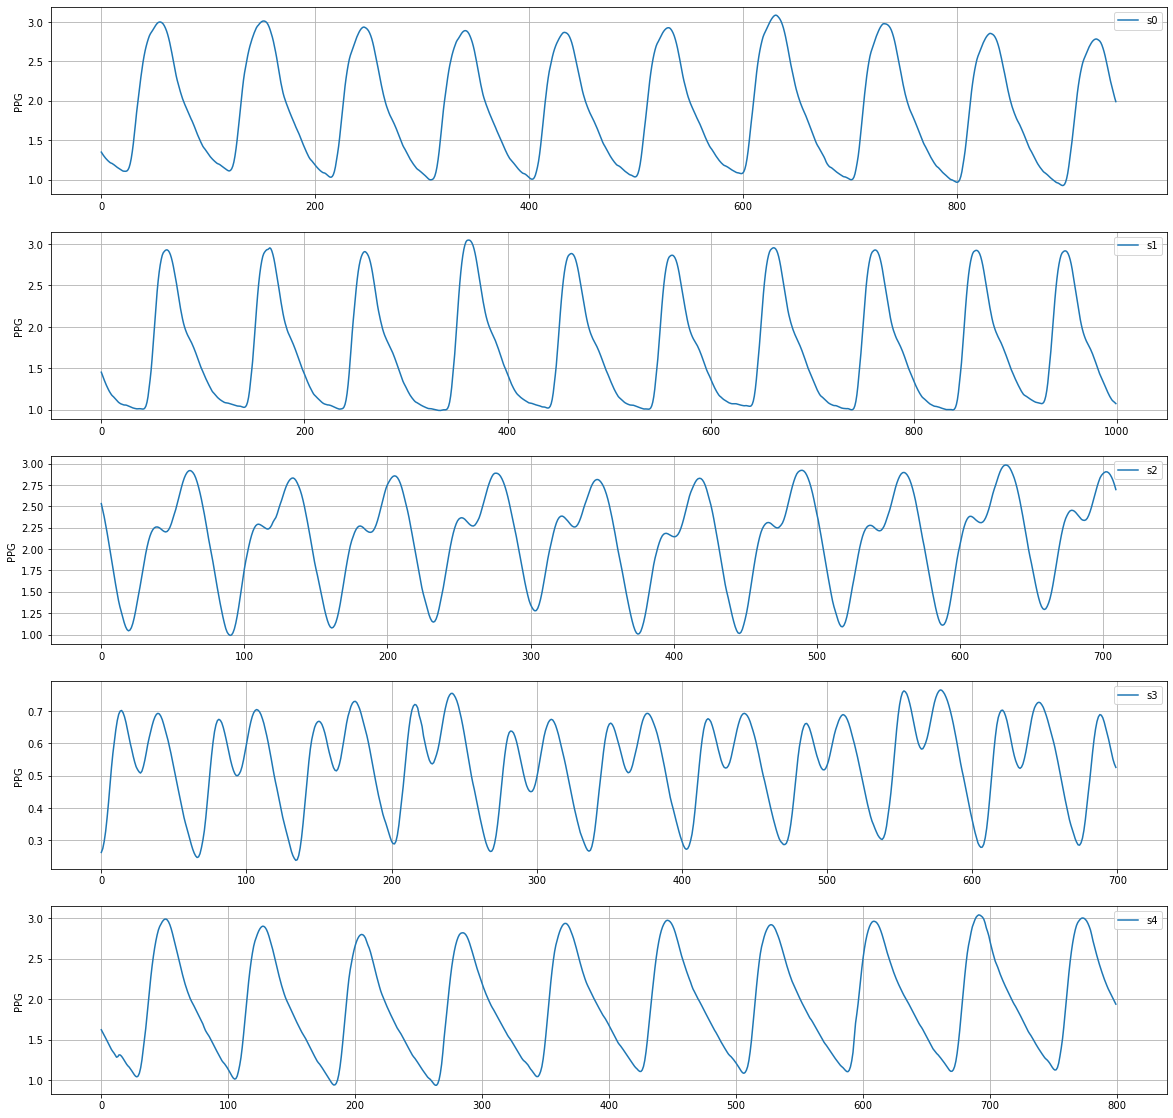

In [166]:
#Ploting data_test
i=0
fig,ax=plt.subplots(5,figsize=(20,20))
for r in range(0,len(data_test)):
    ax[r].plot(data_test_PPG[r])
    ax[r].grid(True)
    ax[r].legend(['s%d'%(r)])
    #ax[r].set_xlim(0,2000)
    #ax[r].set_ylim(0,4)
    ax[r].set_ylabel('PPG')

In [167]:
#Creating Dataset with same length
length=[]
for i in range(0,len(data_test_PPG )):
    length.append(len(data_test_PPG [i]))
print('Max length=',max(length)) 

arr=[0]*len(data_test_PPG)
for data in range(0,len(data_test_PPG)):
    x=np.linspace(0,len(data_test_PPG[data])-1,len(data_test_PPG[data]))
    y=data_test_PPG[data]
    add=max(length)-len(data_test_PPG[data])
    mymodel = np.poly1d(np.polyfit(x, y,2))
    #myline = np.linspace(0,158,159)
    #plt.scatter(x, y)
    #plt.plot(myline, mymodel(myline))
    #plt.show()
    l=[]
    for i in range(len(data_test_PPG[data]),max(length)):
        l.append(mymodel(i))
    arr[data] = np.concatenate((data_test_PPG[data].tolist(), l))

Max length= 1000


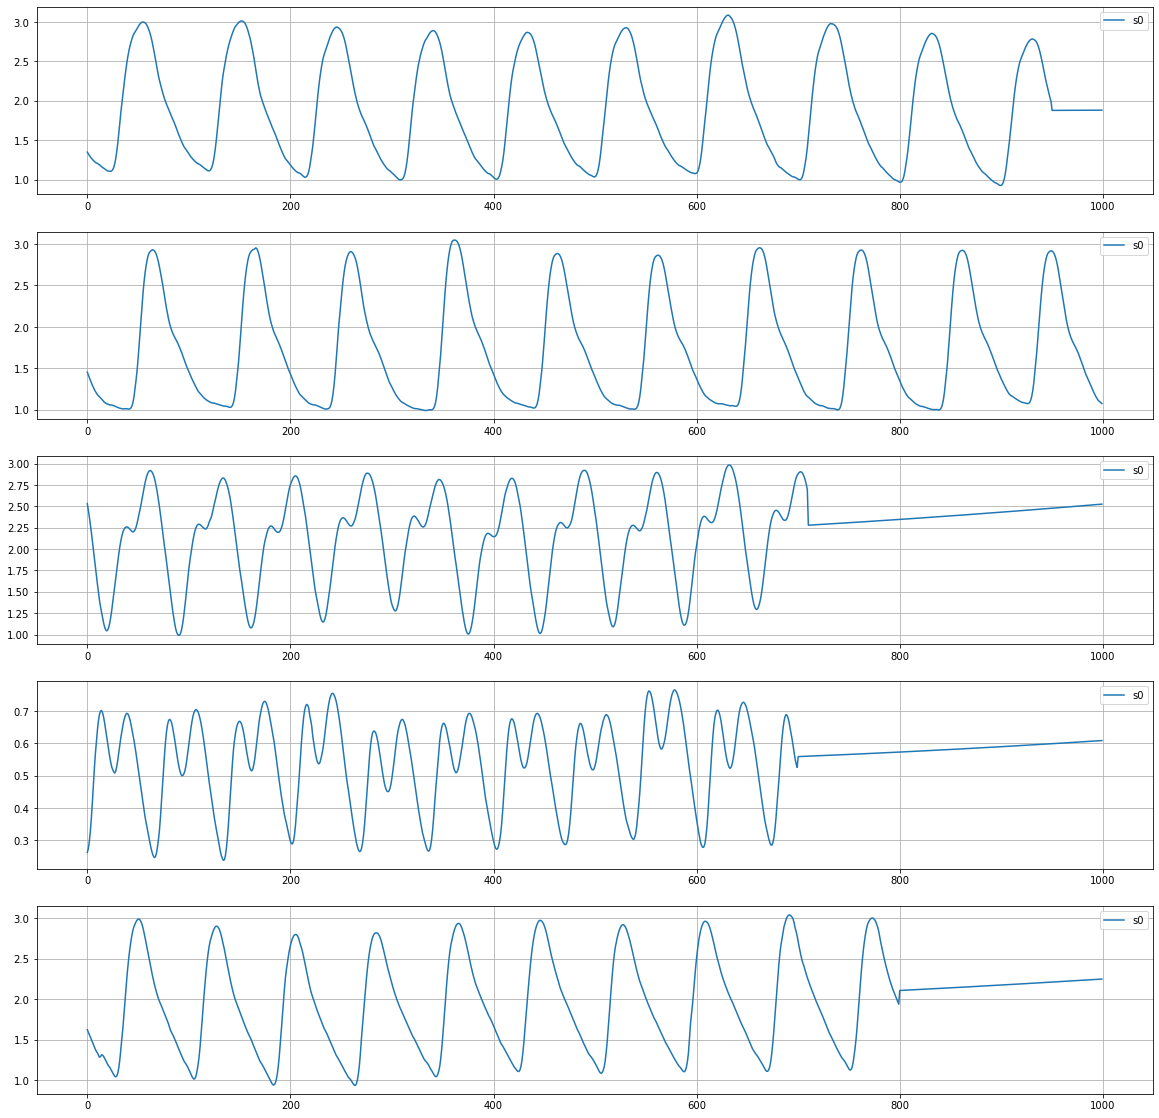

In [168]:
#ploting dataset (they have same length)
i=0
fig,ax=plt.subplots(5,figsize=(20,20))
for r in range(0,5):
    ax[r].plot(arr[r])
    ax[r].grid(True)
    ax[r].legend(['s%d'%(i)])
    #ax[r,c].set_xlim(0,200)
    #ax[r,c].set_ylim(1,3)

   

In [169]:
# All Data that we can use
sample=['sample'+str(i) for i in range(0,len(data_PPG))]
f=['f'+str(i) for i in range(0,max(length))]

data_=pd.DataFrame(columns=[*f])
for i in range(0,len(data_test_PPG)):
    for j in range(0,len(arr[i])):
        data_.loc[i,'f'+str(j)]=arr[i][j]
    

print(data_.head())
print(data_.shape)

         f0        f1        f2        f3        f4        f5        f6  \
0     1.348   1.32649   1.30596   1.28739   1.27077   1.25513   1.24145   
1   1.45455   1.42131   1.38807   1.35679   1.32649   1.29717   1.26979   
2   2.53177   2.45552   2.37928   2.29032   2.19648   2.09775   1.99511   
3  0.262952  0.274682  0.297165  0.328446  0.370479  0.418377  0.472141   
4   1.62366   1.59433     1.565    1.5347    1.5044   1.47312   1.44184   

         f7        f8        f9  ...      f990      f991      f992      f993  \
0   1.22874   1.21701   1.20919  ...   1.87995   1.88001   1.88007   1.88013   
1   1.24536    1.2219   1.20137  ...   1.24047    1.2131   1.18671   1.16325   
2    1.8915    1.7869   1.68524  ...   2.51659   2.51758   2.51857   2.51957   
3  0.524927  0.569892  0.607038  ...  0.607034  0.607237  0.607439  0.607641   
4   1.41056   1.38025   1.35679  ...   2.24178   2.24255   2.24332    2.2441   

       f994      f995      f996      f997      f998      f999  
0   

In [170]:
#PCA
# Separating out the features
x = data_.loc[:, f].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
N=1
pca = PCA(n_components=N)
principalComponents = pca.fit_transform(x)
feature_pca=['pca'+str(i) for i in range(0,N)]
principalDf = pd.DataFrame(data = principalComponents, columns = [*feature_pca])
data_test_PCA=principalDf.loc[0:, feature_pca].values
principalDf

pca0
0  -7.288890
1  -1.580166
2 -25.064618
3  48.023111
4 -14.089438

In [171]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(bx_sys)
poly.fit(X_poly, by_sys)
lin2 = LinearRegression()
lin2.fit(X_poly, by_sys)

X_poly_test_ = poly.fit_transform(data_test_PCA)
s2_test_sys  = lin2.predict(X_poly_test_)



# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(bx_dia)
poly.fit(X_poly, by_dia)
lin2 = LinearRegression()
lin2.fit(X_poly, by_dia)
X_poly_test__ = poly.fit_transform(data_test_PCA)
s2_test_dia = lin2.predict(X_poly_test__)



for i in range(0,len(s2_test_sys)):
    print("Sample %d : Systolic=%f , Diastolic=%f "%(i,s2_test_sys[i],s2_test_dia[i]))
    print('\n')

Sample 0 : Systolic=135.188938 , Diastolic=66.716840 


Sample 1 : Systolic=133.379921 , Diastolic=64.239281 


Sample 2 : Systolic=129.312556 , Diastolic=68.334737 


Sample 3 : Systolic=100.905004 , Diastolic=64.822924 


Sample 4 : Systolic=135.272723 , Diastolic=68.982976 


